# Document Embedding Analysis for NQ10K Dataset
This notebook analyzes the relationship between document embeddings and their probabilities in the model's output distribution.
We will:
1. Import the NQ10K dataset.
2. Use a pre-trained document embedding model.
3. Perform experiments to explore embedding similarity and clustering.

#### Import Required Libraries
This cell imports the necessary libraries for data processing, embedding generation, similarity computation, and visualization.

In [2]:
# Import Required Libraries
import json
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap

/home/eliasshaheen/miniconda3/envs/re-gen-ir-venv/lib/python3.8/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


#### Load the NQ10K Dataset
This cell loads the NQ10K dataset from the specified JSON file and prints the number of documents loaded.

In [3]:
# Load the NQ10K Dataset
with open('NQ10k/NQ10k/documents-10000-7423.json', 'r') as f:
    documents = json.load(f)
print(f"Loaded {len(documents)} documents.")

Loaded 10000 documents.


In [4]:
documents[0:5]

[{'id': -2081335883615568321,
  'text': "Cockroach - wikipedia  Cockroach  This article is about the insect . For other uses , see Cockroach ( disambiguation ) .      Cockroach Temporal range : 145 -- 0 Ma PreЄ Є Pg Cretaceous -- recent         Common household cockroaches A ) German cockroach B) American cockroach C ) Australian cockroach D&E ) Oriental cockroach ( ♀ & ♂ )     Scientific classification     Kingdom :   Animalia     Phylum :   Arthropoda     Class :   Insecta     Superorder :   Dictyoptera     Order :   Blattodea     Families      Blaberidae Blattidae Corydiidae Cryptocercidae Ectobiidae Lamproblattidae Nocticolidae Tryonicidae      Cockroaches are insects of the order Blattodea , which also includes termites . About 30 cockroach species out of 4,600 are associated with human habitats . About four species are well known as pests .   The cockroaches are an ancient group , dating back at least as far as the Carboniferous period , some 320 million years ago . Those early a

#### Set Up Document Embedding Model
This cell initializes the SentenceTransformer model for generating document embeddings.

In [5]:
# Set Up Document Embedding Model
embedding_model = SentenceTransformer('sentence-transformers/multi-qa-mpnet-base-dot-v1')
print("Document embedding model loaded.")

/home/eliasshaheen/miniconda3/envs/re-gen-ir-venv/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Document embedding model loaded.


#### Generate Document Embeddings
This cell generates embeddings for all documents in the dataset using the SentenceTransformer model.

In [6]:
import os

embeddings_path = "document_embeddings_multi-qa-mpnet-base-dot-v1.npy"

if os.path.exists(embeddings_path):
    document_embeddings = np.load(embeddings_path)
    print(f"Loaded embeddings from {embeddings_path}.")
else:
    document_texts = [doc['text'] for doc in documents]
    document_embeddings = embedding_model.encode(document_texts, show_progress_bar=True)
    np.save(embeddings_path, document_embeddings)
    print(f"Generated and saved embeddings to {embeddings_path}.")
print(f"Embeddings shape: {document_embeddings.shape}")

Loaded embeddings from document_embeddings_multi-qa-mpnet-base-dot-v1.npy.
Embeddings shape: (10000, 768)


In [7]:
import random
for i in range(10):
    idx = random.randint(1,10000)
    print(f"Document {idx}")
    cur_text = documents[idx]['text']
    cur_document_embedding = embedding_model.encode(cur_text)
    if np.allclose(cur_document_embedding, document_embeddings[idx], atol=1e-6):
        print("equal")
    else:
        print("not equal")

Document 6559
equal
Document 278
equal
Document 4789
equal
Document 8078
equal
Document 9059
equal
Document 3433
equal
Document 2659
equal
Document 3113
equal
Document 2742
equal
Document 7008
equal


#### Compute Cosine Similarity
This cell computes pairwise cosine similarity between document embeddings to analyze their relationships.

In [8]:
# Compute Cosine Similarity
similarity_matrix = cosine_similarity(document_embeddings)
print("Computed cosine similarity matrix.")

Computed cosine similarity matrix.


#### Visualize Embedding Space with t-SNE
t-SNE (t-Distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique that visualizes high-dimensional data in a lower-dimensional space, typically 2D or 3D, while preserving local relationships.
This cell uses t-SNE to reduce the dimensionality of document embeddings and visualize their distribution in a 2D space.

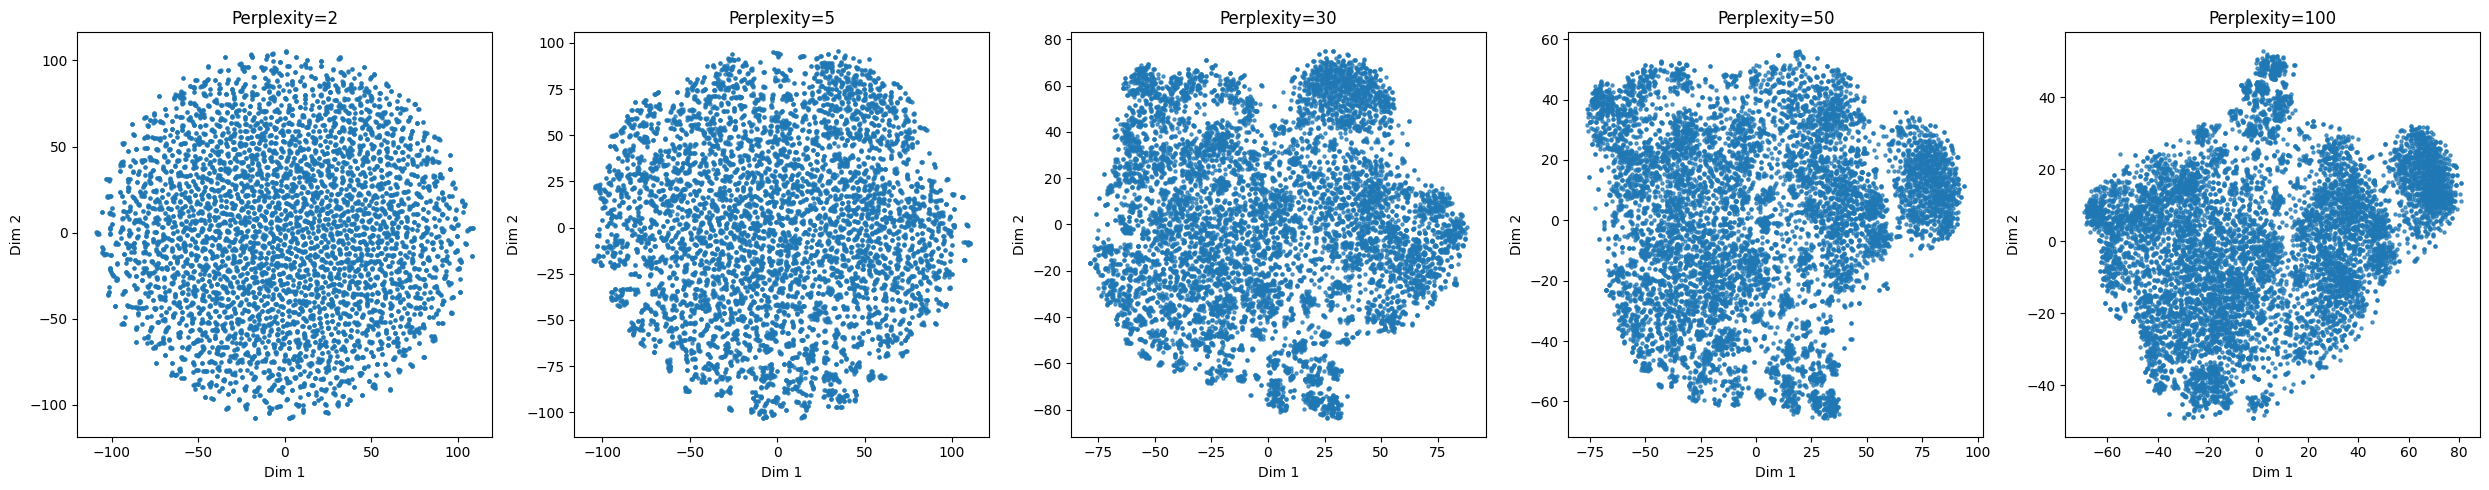

In [ ]:
perplexities = [2, 5, 30, 50, 100]
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    embedding_2d = tsne.fit_transform(document_embeddings)
    axes[i].scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=5, alpha=0.7)
    axes[i].set_title(f"Perplexity={perplexity}")
    axes[i].set_xlabel("Dim 1")
    axes[i].set_ylabel("Dim 2")

plt.tight_layout()
plt.show()

#### Visualize Embedding Space with UMAP

/home/eliasshaheen/miniconda3/envs/re-gen-ir-venv/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/eliasshaheen/miniconda3/envs/re-gen-ir-venv/lib/python3.8/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/eliasshaheen/miniconda3/envs/re-gen-ir-venv/lib/python3.8/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/eliasshaheen/miniconda3/envs/re-gen-ir-venv/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting ran

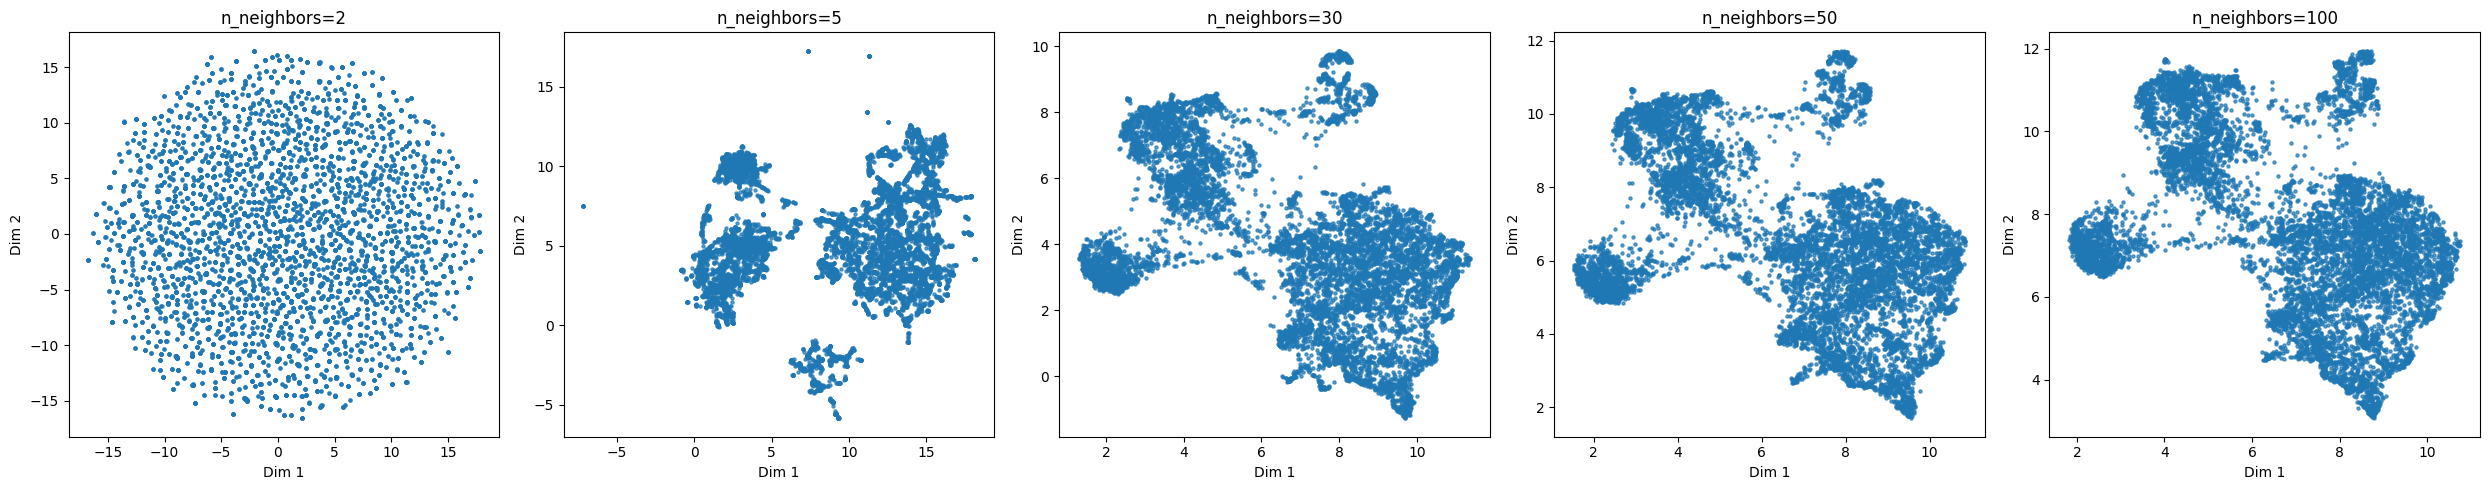

In [23]:
import umap

n_neighbors_list = [2, 5, 30, 50, 100]
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for i, n_neighbors in enumerate(n_neighbors_list):
    reducer = umap.UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=0.1, random_state=42)
    embedding_2d = reducer.fit_transform(document_embeddings)
    axes[i].scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=5, alpha=0.7)
    axes[i].set_title(f"n_neighbors={n_neighbors}")
    axes[i].set_xlabel("Dim 1")
    axes[i].set_ylabel("Dim 2")

plt.tight_layout()
plt.show()

#### Manual Validation of the embedding model

##### Check for duplications in the NQ10K document texts.

In [9]:
# Extract document texts
document_texts = [doc['text'] for doc in documents]

# Create dictionary to store document counts and indices
text_counts = {}
exact_duplicates = []
stripped_duplicates = []

# Check for exact and stripped duplicates
for idx, text in enumerate(document_texts):
    # Check exact duplicates
    if text in text_counts:
        text_counts[text].append(idx)
        exact_duplicates.append((text, text_counts[text]))
    else:
        text_counts[text] = [idx]
    
    # Check stripped duplicates (removing whitespace and lowercase)
    stripped_text = text.lower().strip()
    if stripped_text in text_counts:
        if text != document_texts[text_counts[stripped_text][0]]:  # Only if not exact duplicate
            stripped_duplicates.append((idx, text_counts[stripped_text][0]))

# Print results
print(f"Total documents: {len(document_texts)}")
print(f"Unique documents: {len(text_counts)}")
print(f"\nFound {len(exact_duplicates)} sets of exact duplicates")
if exact_duplicates:
    print("\nExample exact duplicates:")
    for i, (text, indices) in enumerate(exact_duplicates[:3]):
        print(f"\nDuplicate set {i+1}:")
        print(f"Indices: {indices}")
        print(f"Text: {text[:100]}...")

print(f"\nFound {len(stripped_duplicates)} pairs of stripped duplicates")
if stripped_duplicates:
    print("\nExample stripped duplicates:")
    for i, (idx1, idx2) in enumerate(stripped_duplicates[:3]):
        print(f"\nStripped duplicate pair {i+1}:")
        print(f"Index {idx1}: {document_texts[idx1][:100]}...")
        print(f"Index {idx2}: {document_texts[idx2][:100]}...")

Total documents: 10000
Unique documents: 10000

Found 0 sets of exact duplicates

Found 0 pairs of stripped duplicates


##### Check Top 5 Similar and Dissimilar Documet Text Pairs

In [10]:
# Get upper triangle indices to avoid duplicate pairs and self-similarity
upper_tri_indices = np.triu_indices(similarity_matrix.shape[0], k=1)
similarities = similarity_matrix[upper_tri_indices]

# Print similarity statistics
print("Similarity Statistics (excluding self-similarity):")
print(f"Mean similarity: {np.mean(similarities):.4f}")
print(f"Median similarity: {np.median(similarities):.4f}")
print(f"Min similarity: {np.min(similarities):.4f}")
print(f"Max similarity: {np.max(similarities):.4f}")
print("-" * 50)

# Get indices of top 5 similar pairs (highest similarity)
top_similar_indices = np.argsort(similarities)[-5:][::-1]
top_similar_pairs = [(upper_tri_indices[0][i], upper_tri_indices[1][i]) 
                    for i in top_similar_indices]

# Get indices of top 5 dissimilar pairs (lowest similarity)
top_dissimilar_indices = np.argsort(similarities)[:5]
top_dissimilar_pairs = [(upper_tri_indices[0][i], upper_tri_indices[1][i]) 
                        for i in top_dissimilar_indices]

print("\nTop 5 Similar Document Pairs:")
print("-----------------------------")
for i, (doc1_idx, doc2_idx) in enumerate(top_similar_pairs, 1):
    similarity = similarity_matrix[doc1_idx, doc2_idx]
    print(f"\nPair {i} (Similarity: {similarity:.4f}):")
    print(f"Document 1: {documents[doc1_idx]['text'][:100]}...")
    print(f"Document 2: {documents[doc2_idx]['text'][:100]}...")

print("\nTop 5 Dissimilar Document Pairs:")
print("--------------------------------")
for i, (doc1_idx, doc2_idx) in enumerate(top_dissimilar_pairs, 1):
    similarity = similarity_matrix[doc1_idx, doc2_idx]
    print(f"\nPair {i} (Similarity: {similarity:.4f}):")
    print(f"Document 1: {documents[doc1_idx]['text'][:100]}...")
    print(f"Document 2: {documents[doc2_idx]['text'][:100]}...")

Similarity Statistics (excluding self-similarity):
Mean similarity: 0.1762
Median similarity: 0.1671
Min similarity: -0.1586
Max similarity: 1.0000
--------------------------------------------------

Top 5 Similar Document Pairs:
-----------------------------

Pair 1 (Similarity: 1.0000):
Document 1: Avatar : the Last Airbender - wikipedia  Avatar : the Last Airbender  Jump to : navigation , search ...
Document 2: Avatar : the Last Airbender - wikipedia  Avatar : the Last Airbender  Jump to : navigation , search ...

Pair 2 (Similarity: 1.0000):
Document 1: Whole genome sequencing - wikipedia  Whole genome sequencing  Jump to : navigation , search `` Genom...
Document 2: Whole genome sequencing - wikipedia  Whole genome sequencing  Jump to : navigation , search `` Genom...

Pair 3 (Similarity: 1.0000):
Document 1: Geraldine Ferraro - wikipedia  Geraldine Ferraro  Not to be confused with Geraldine Farrar .      Ge...
Document 2: Geraldine Ferraro - wikipedia  Geraldine Ferraro  Not to b

In [11]:
# Analyze similarity matrix for values > 1.0, == 1.0, and self-similarities

# Get upper triangle indices to avoid duplicate pairs and self-similarity
upper_tri_indices = np.triu_indices(similarity_matrix.shape[0], k=1)
similarities = similarity_matrix[upper_tri_indices]

# Count similarities > 1.0 and >= 1.0 (excluding self-similarities)
num_greater_than_1 = np.sum(similarities > 1.0)
num_ge_1 = np.sum(similarities >= 1.0)
num_equal_1 = np.sum(similarities == 1.0)

print("Similarity Matrix Analysis (excluding self-similarities):")
print(f"  Number of similarities > 1.0 : {num_greater_than_1:,}")
print(f"  Number of similarities == 1.0: {num_equal_1:,}")
print(f"  Number of similarities >= 1.0: {num_ge_1:,}")

# Show sorted similarity values
sorted_similarities = np.sort(similarities)
print("\nSorted Similarity Values (excluding self-similarities):")
print(f"  First 10  : {np.round(sorted_similarities[:10], 4)}")
print(f"  Last  15  : {np.round(sorted_similarities[-15:], 4)}")

# Analyze self-similarities (main diagonal)
main_diagonal = np.diag(similarity_matrix)
print("\nSelf-Similarities (main diagonal):")
print(f"  Count         : {len(main_diagonal):,}")
print(f"  Min           : {main_diagonal.min():.4f}")
print(f"  Max           : {main_diagonal.max():.4f}")
print(f"  Mean          : {main_diagonal.mean():.4f}")
print(f"  Number > 1.0  : {np.sum(main_diagonal > 1.0):,}")
print(f"  Number < 1.0  : {np.sum(main_diagonal < 1.0):,}")
print(f"  Number == 1.0 : {np.sum(main_diagonal == 1.0):,}")


Similarity Matrix Analysis (excluding self-similarities):
  Number of similarities > 1.0 : 7
  Number of similarities == 1.0: 3
  Number of similarities >= 1.0: 10

Sorted Similarity Values (excluding self-similarities):
  First 10  : [-0.1586 -0.1574 -0.1451 -0.1427 -0.1426 -0.1415 -0.1399 -0.1386 -0.1376
 -0.135 ]
  Last  15  : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Self-Similarities (main diagonal):
  Count         : 10,000
  Min           : 1.0000
  Max           : 1.0000
  Mean          : 1.0000
  Number > 1.0  : 3,540
  Number < 1.0  : 3,976
  Number == 1.0 : 2,484


##### Assuring that the above 1 similarity results are of non identical documents

In [12]:
for doc1_idx, doc2_idx in top_similar_pairs:
    print(f"\nComparing documents {doc1_idx} vs {doc2_idx}")
    print(f"Doc1 ID: {documents[doc1_idx]['id']}")
    print(f"Doc2 ID: {documents[doc2_idx]['id']}")
    
    text1 = documents[doc1_idx]['text']
    text2 = documents[doc2_idx]['text']
    
    # Compare lengths
    print(f"Length Doc1: {len(text1)}")
    print(f"Length Doc2: {len(text2)}")
    
    # Compare character by character
    if len(text1) == len(text2):
        diffs = [(i, c1, c2) for i, (c1, c2) in enumerate(zip(text1, text2)) if c1 != c2]
        if diffs:
            print("\nCharacter differences:")
            for pos, char1, char2 in diffs[:5]:  # Show first 5 differences
                print(f"Position {pos}: '{char1}' vs '{char2}'")
    else:
        print("Documents have different lengths!")
    
    print("-" * 50)


Comparing documents 1355 vs 8719
Doc1 ID: -4048788574245040030
Doc2 ID: -9044766538067253255
Length Doc1: 54540
Length Doc2: 54420
Documents have different lengths!
--------------------------------------------------

Comparing documents 1410 vs 8406
Doc1 ID: -5509600482813842991
Doc2 ID: -5404488388406800793
Length Doc1: 63742
Length Doc2: 60794
Documents have different lengths!
--------------------------------------------------

Comparing documents 182 vs 7261
Doc1 ID: -4804774306725724727
Doc2 ID: -978476110612276046
Length Doc1: 109995
Length Doc2: 109989
Documents have different lengths!
--------------------------------------------------

Comparing documents 1079 vs 2777
Doc1 ID: 6842212029231742066
Doc2 ID: 6292335976293739991
Length Doc1: 31124
Length Doc2: 31317
Documents have different lengths!
--------------------------------------------------

Comparing documents 1628 vs 3125
Doc1 ID: -4239091644991703708
Doc2 ID: 3153611742180391842
Length Doc1: 18526
Length Doc2: 18523
Doc

##### Some more documents pairs in different top similarity levels

In [13]:
# Get upper triangle indices to avoid duplicate pairs and self-similarity
upper_tri_indices = np.triu_indices(similarity_matrix.shape[0], k=1)
similarities = similarity_matrix[upper_tri_indices]

# Define similarity thresholds
thresholds = [1.1, 0.95, 0.90, 0.85, 0.80, 0.75, 0.70]

for idx, threshold in enumerate(thresholds):
    if idx == 0:
        continue
    # Find similar pairs above threshold but below 1.0
    prev_threshold = thresholds[idx - 1]
    similar_pairs_mask = (similarities >= threshold) & (similarities < prev_threshold)
    similar_pairs_indices = np.where(similar_pairs_mask)[0]
    
    print(f"\nDocument pairs with similarity >= {threshold} but < {prev_threshold}:")
    print(f"Found {len(similar_pairs_indices)} pairs")
    
    if len(similar_pairs_indices) > 0:
        print("\nExample pairs:")
        # Show top 3 examples for each threshold
        for idx in similar_pairs_indices[:3]:
            doc1_idx = upper_tri_indices[0][idx]
            doc2_idx = upper_tri_indices[1][idx]
            similarity = similarity_matrix[doc1_idx, doc2_idx]
            
            print(f"\nPair with similarity {similarity:.4f}:")
            print(f"Document 1 (ID: {documents[doc1_idx]['id']}):")
            print(f"{documents[doc1_idx]['text'][:100]}...")
            print(f"\nDocument 2 (ID: {documents[doc2_idx]['id']}):")
            print(f"{documents[doc2_idx]['text'][:100]}...")
    print("-" * 80)


Document pairs with similarity >= 0.95 but < 1.1:
Found 536 pairs

Example pairs:

Pair with similarity 0.9934:
Document 1 (ID: -4902966927894222877):
Golden Gate Bridge - wikipedia  Golden Gate Bridge       Golden Gate Bridge         Coordinates   37...

Document 2 (ID: -8367462529797331702):
Golden Gate Bridge - wikipedia  Golden Gate Bridge  Jump to : navigation , search    Golden Gate Bri...

Pair with similarity 0.9990:
Document 1 (ID: -8717325281435769975):
Eagle Scout ( Boy Scouts of America ) - wikipedia  Eagle Scout ( Boy Scouts of America )       Eagle...

Document 2 (ID: -5610127219516457042):
Eagle Scout ( Boy Scouts of America ) - wikipedia  Eagle Scout ( Boy Scouts of America )  Jump to : ...

Pair with similarity 0.9952:
Document 1 (ID: -3988876736366310677):
Tropical rainforest climate - wikipedia  Tropical rainforest climate  Jump to : navigation , search ...

Document 2 (ID: 4306041893754874768):
Tropical rainforest climate - wikipedia  Tropical rainforest climate  J

##### Some more documents pairs in different bottom similarity levels

In [14]:
# Get upper triangle indices to avoid duplicate pairs and self-similarity
upper_tri_indices = np.triu_indices(similarity_matrix.shape[0], k=1)
similarities = similarity_matrix[upper_tri_indices]

# Define bottom similarity thresholds starting from lowest found
min_sim = np.min(similarities)
thresholds = [round(min_sim + i*0.1, 2) for i in range(5)]  # Create 5 thresholds from min
thresholds.sort()  # Sort in ascending order

for idx, threshold in enumerate(thresholds[:-1]):  # Go through all thresholds except last
    # Find pairs between current and next threshold
    next_threshold = thresholds[idx + 1]
    similar_pairs_mask = (similarities >= threshold) & (similarities < next_threshold)
    similar_pairs_indices = np.where(similar_pairs_mask)[0]
    
    print(f"\nDocument pairs with similarity {threshold} <=  but < {next_threshold}:")
    print(f"Found {len(similar_pairs_indices)} pairs")
    
    if len(similar_pairs_indices) > 0:
        print("\nExample pairs:")
        # Show top 3 examples for each threshold
        for idx in similar_pairs_indices[:3]:
            doc1_idx = upper_tri_indices[0][idx]
            doc2_idx = upper_tri_indices[1][idx]
            similarity = similarity_matrix[doc1_idx, doc2_idx]
            
            print(f"\nPair with similarity {similarity:.4f}:")
            print(f"Document 1 (ID: {documents[doc1_idx]['id']}):")
            print(f"{documents[doc1_idx]['text'][:150]}...")
            print(f"\nDocument 2 (ID: {documents[doc2_idx]['id']}):")
            print(f"{documents[doc2_idx]['text'][:150]}...")
    print("-" * 80)


Document pairs with similarity -0.16 <=  but < -0.06:
Found 5168 pairs

Example pairs:

Pair with similarity -0.0691:
Document 1 (ID: 5450119816198102820):
Biometric passport - wikipedia  Biometric passport  Jump to : navigation , search This biometric symbol is usually printed on the cover of biometric p...

Document 2 (ID: -8276125247410934436):
Fletcher Henderson - wikipedia  Fletcher Henderson  Jump to : navigation , search      This article needs additional citations for verification . Plea...

Pair with similarity -0.0683:
Document 1 (ID: 5450119816198102820):
Biometric passport - wikipedia  Biometric passport  Jump to : navigation , search This biometric symbol is usually printed on the cover of biometric p...

Document 2 (ID: 773952238389039170):
Let the Good Times Roll ( Shirley and Lee song ) - Wikipedia  Let the Good Times Roll ( Shirley and Lee song )  Jump to : navigation , search This art...

Pair with similarity -0.0623:
Document 1 (ID: 5450119816198102820):
Biometric p

#### Import and Load GenIR Model
This cell imports the GenIR model (DSI-large-7423) and loads it for inference.

In [15]:
# Import and Load GenIR Model
from transformers import T5ForConditionalGeneration, AutoTokenizer
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
genIR_model_path = "DSI-large-7423"
tokenizer = AutoTokenizer.from_pretrained(genIR_model_path)
model = T5ForConditionalGeneration.from_pretrained(genIR_model_path).to(device)
model.eval()
print("GenIR model loaded successfully.")

GenIR model loaded successfully.


#### Load Test Samples
This cell loads the test samples for the GenIR model from the appropriate dataset or file.

In [16]:
# Load Test Samples
test_samples_path = "/home/eliasshaheen/re-gen-ir/NQ10k/NQ10k/test_queries-10000-7423.json"
with open(test_samples_path, "r") as f:
    test_samples = json.load(f)
print(f"Loaded {len(test_samples)} test samples.")

Loaded 1000 test samples.


In [17]:
test_samples[:5]

[{'id': 'Q-590834235052106634',
  'query': 'what is the name for the ch3coo- ion',
  'relevant_docs': [-590834235052106634]},
 {'id': 'Q6224081265211326195',
  'query': 'who sang the theme song to the brady bunch',
  'relevant_docs': [6224081265211326195]},
 {'id': 'Q8844619839870903',
  'query': 'what does the winner of the rap game get',
  'relevant_docs': [8844619839870903]},
 {'id': 'Q2546571079738727098',
  'query': 'what are the active materials of a lead acid battery',
  'relevant_docs': [2546571079738727098]},
 {'id': 'Q-8653043892930475317',
  'query': 'sufficient conditions express a requirement for some occurrence or state of affairs',
  'relevant_docs': [-8653043892930475317]}]

In [18]:
test_ids = [int(sample['id'][1:]) for sample in test_samples]
doc_id_to_index = {doc["id"]: idx for idx, doc in enumerate(documents)}
indices = [doc_id_to_index[doc_id] for doc_id in test_ids]
embeddings = [(document_embeddings[idx], 0.001) for idx in indices]
layout_embeddings_with_probabilities_umap(embeddings, document_embeddings, title="Test Samples GT")

NameError: name 'layout_embeddings_with_probabilities_umap' is not defined

#### Feed Test Samples to GenIR Model
This cell feeds the test samples to the GenIR model and retrieves the logits for further analysis.

In [ ]:
import sys
sys.path.append('./code/utils')
from utils import extract_doc_id

# Feed Test Samples to GenIR Model
logits_list = []
correct_mask = []

for sample in test_samples:
    input_ids = tokenizer(sample['query'], return_tensors='pt').input_ids.to(device)
    decoder_input_ids = torch.tensor([[model.config.decoder_start_token_id]]).to(device)
    with torch.no_grad():
        outputs = model(input_ids=input_ids, decoder_input_ids=decoder_input_ids)
        logits = outputs.logits.cpu().numpy()
        logits_list.append(logits)
        
        # Get top prediction
        top_idx = np.argmax(logits, axis=-1).flatten()[0]
        pred_docid = tokenizer.decode([top_idx], skip_special_tokens=True)
        pred_docid = int(extract_doc_id(pred_docid))
        correct_docid = int(sample['relevant_docs'][0]) if sample['relevant_docs'] else -1
        correct_mask.append(pred_docid == correct_docid)

print(f"Processed {len(logits_list)} test samples.")
if logits_list:
    print(f"Example logits shape: {logits_list[0].shape}")
    print(f"Example logits values (first 5): {logits_list[0].flatten()[:5]}")
print(f"Accuracy: {np.mean(correct_mask):.4f}")

Processed 1000 test samples.
Example logits shape: (1, 1, 42100)
Example logits values (first 5): [-164.63289   -92.056854  -73.247795  -44.156822 -118.360596]
Accuracy: 0.4140


#### Extract Document IDs from Logits (95% of PDF)
This cell extracts tokens corresponding to document IDs from the logits generated by the GenIR model.

In [ ]:
# Extract Document IDs contributing to 95% of the distribution probability density
document_ids_with_probs_list = []  # List to store document IDs and probabilities
for logits in logits_list:
    # Perform softmax to get probabilities
    probabilities = np.exp(logits) / np.sum(np.exp(logits), axis=-1, keepdims=True)
    
    # Flatten probabilities and sort indices by descending probability
    flattened_probs = probabilities.flatten()
    sorted_indices = np.argsort(flattened_probs)[::-1]
    
    # Iteratively sum probabilities until 95% of the density is reached
    cumulative_prob = 0.0
    selected_indices = []
    selected_probs = []
    for idx in sorted_indices:
        cumulative_prob += flattened_probs[idx]
        selected_indices.append(idx)
        selected_probs.append(flattened_probs[idx])
        if cumulative_prob >= 0.95:
            break
    
    # Decode selected indices into document IDs
    document_ids = tokenizer.batch_decode(selected_indices, skip_special_tokens=True)
    document_ids = [doc_id for doc_id in document_ids if doc_id.startswith("@DOC_ID_") and doc_id.endswith("@")]
    document_ids = [int(extract_doc_id(doc_id)) for doc_id in document_ids]  # Convert to integer IDs

    # Combine document IDs with their probabilities
    document_ids_with_probs = list(zip(document_ids, selected_probs))
    document_ids_with_probs_list.append(document_ids_with_probs)

# Print an example of extracted document IDs and probabilities
if document_ids_with_probs_list:
    print(f"Example extracted document IDs and probabilities: {document_ids_with_probs_list[0]}")

print(f"Extracted document IDs and probabilities for {len(document_ids_with_probs_list)} test samples.")

Example extracted document IDs and probabilities: [(-2242567282397434659, 0.3096722), (-5199123699009802392, 0.2953293), (-4144701460982153551, 0.09634745), (-2420047523414130083, 0.0715048), (6472318826891050136, 0.017626569), (-3978623827559693653, 0.0088492725), (-5407416812098226229, 0.008712983), (-613067450106847748, 0.007893841), (-1268188710047305520, 0.0078121372), (6139051254465298092, 0.0067535043), (4717523525368933867, 0.0061137327), (-871095994652440879, 0.005178941), (6657707097106367694, 0.0037378338), (-713331273291662482, 0.0036602837), (1559936187919517066, 0.0035238282), (-4780821300461125494, 0.00337535), (-2244798821441304446, 0.002855346), (-3723199431165071947, 0.0025974384), (7840583517077536992, 0.0024591328), (-2251007968057854328, 0.002297603), (3675335450553715045, 0.0022285355), (5468893035004523563, 0.0020495872), (-8083017426536732807, 0.002022659), (-8350814282881422266, 0.0020021035), (-5587610760391484478, 0.001981489), (5507426312908055979, 0.0018659

In [ ]:
predicted_ids_probs = {}
predicted_ids_probs_sum = {}
predicted_ids_count = {}

for document_ids_with_probs in document_ids_with_probs_list:
    for doc_id, prob in document_ids_with_probs:
        if doc_id not in predicted_ids_probs:
            predicted_ids_probs[doc_id] = []
        predicted_ids_probs[doc_id].append(prob)

for doc_id, probs in predicted_ids_probs.items():
    if len(probs) > 20:
        predicted_ids_probs_sum[doc_id] = np.sum(probs)  # Average probabilities for each document ID
    predicted_ids_count[doc_id] = len(probs)  # Average probabilities for each document ID
print(f"len of predicted_ids_probs_sum: {len(predicted_ids_probs_sum)}")

len of predicted_ids_probs_sum: 1120


/home/eliasshaheen/miniconda3/envs/re-gen-ir-venv/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


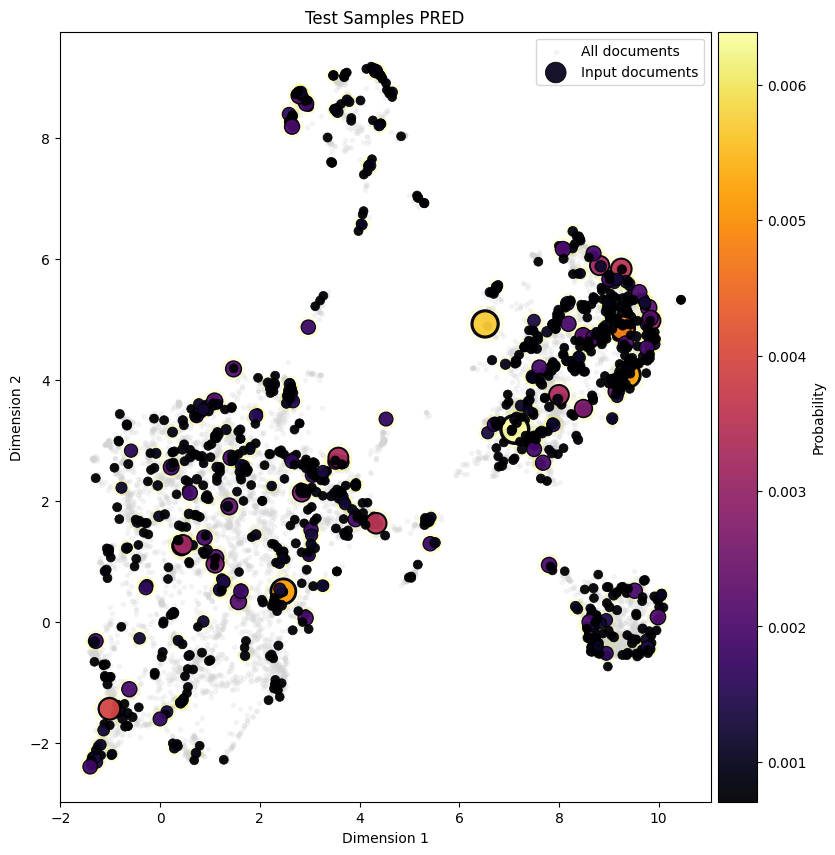

In [ ]:
import numpy as np

# Get values as array
probs = np.array(list(predicted_ids_probs_sum.values()))
# Apply softmax
softmax_probs = np.exp(probs) / np.sum(np.exp(probs))
# Build new dict with same keys, softmaxed values
predicted_ids_softmax = dict(zip(predicted_ids_probs_sum.keys(), softmax_probs))


doc_id_to_index = {doc["id"]: idx for idx, doc in enumerate(documents)}
embeddings = []

for doc_id, prob in predicted_ids_softmax.items():
    if doc_id not in doc_id_to_index:
        print(f"Warning: Document ID {doc_id} not found in documents.")
        continue
    idx = doc_id_to_index[doc_id]
    if idx < 0 or idx >= len(document_embeddings):
        print(f"Warning: Index {idx} out of bounds for document embeddings.")
        continue

    embeddings.append((document_embeddings[idx], prob))
    
layout_embeddings_with_probabilities_umap(embeddings, document_embeddings, title="Test Samples PRED")

#### Extract Document IDs from Logits (100% 0f docids)
This cell extracts tokens corresponding to document IDs from the logits generated by the GenIR model.

In [ ]:
# Extract ALL document IDs and their probabilities (no 95% constraint)
document_ids_with_probs_list = []  # List to store document IDs and probabilities
for logits in logits_list:
    # Perform softmax to get probabilities
    probabilities = np.exp(logits) / np.sum(np.exp(logits), axis=-1, keepdims=True)
    
    # Flatten probabilities
    flattened_probs = probabilities.flatten()
    all_indices = np.arange(len(flattened_probs))
    
    # Decode all indices into document IDs
    document_ids = tokenizer.batch_decode(all_indices, skip_special_tokens=True)
    # Filter only tokens that look like doc id tokens
    document_ids = [doc_id for doc_id in document_ids if doc_id.startswith("@DOC_ID_") and doc_id.endswith("@")]
    
    document_ids = [int(extract_doc_id(doc_id)) for doc_id in document_ids]  # Convert to integer IDs

    # Combine document IDs with their probabilities
    document_ids_with_probs = list(zip(document_ids, flattened_probs))
    document_ids_with_probs_list.append(document_ids_with_probs)

# Print an example of extracted document IDs and probabilities
if document_ids_with_probs_list:
    print(f"Example extracted document IDs and probabilities: {document_ids_with_probs_list[0]}")

print(f"Extracted document IDs and probabilities for {len(document_ids_with_probs_list)} test samples.")
    

Example extracted document IDs and probabilities: [(-2081335883615568321, 0.0), (-3952149172515325408, 1e-44), (3180949643664273199, 1.3905251e-36), (5450119816198102820, 5.9872563e-24), (3369959950731134123, 0.0), (6328671855929848793, 2.7376469e-37), (6035361184366570886, 3.3875194e-26), (138352781929936545, 2.881882e-39), (7402252165412431758, 1.077773e-38), (-2644154875949523750, 0.0), (-3471796156323863710, 0.0), (6070333273965940514, 4.809447e-31), (4914981770483543061, 7.829175e-37), (-6610224977170980268, 0.0), (1551018314916421217, 0.0), (-3191475148767158893, 0.0), (3600692813210463538, 5.033e-42), (-4636347768352449438, 0.0), (-2509309753176255993, 7.4217993e-28), (1752410184363595618, 4.0824577e-38), (-1374932068194623395, 0.0), (2410183720845572781, 1.3e-44), (8148266614370990423, 9.66e-42), (8528128027644832489, 0.0), (-7272129313675735420, 4e-45), (-5953092230358570947, 0.0), (-8201001537442035511, 3.488381e-39), (4385255127522661901, 2.7736e-41), (3168130637547861284, 1

#### Extract documents corresponding to predicted docids for 95%.

In [36]:
from tqdm import tqdm
import os

relevant_docs_path = "relevant_documents_list.npy"
relevant_embeds_path = "relevant_embeddings_with_probs_list.npy"

if os.path.exists(relevant_docs_path) and os.path.exists(relevant_embeds_path):
    relevant_documents_list = np.load(relevant_docs_path, allow_pickle=True).tolist()
    relevant_embeddings_with_probs_list = np.load(relevant_embeds_path, allow_pickle=True).tolist()
    print(f"Loaded relevant documents and embeddings from disk.")
else:
    # Extract relevant documents and generate embeddings
    relevant_documents_list = []  # List to store relevant documents for each test sample
    relevant_embeddings_with_probs_list = []  # List to store embeddings for relevant documents

    documents_dict = {doc['id']: doc['text'] for doc in documents}  # Create a dictionary for quick lookup by document ID

    for document_ids_with_probs in tqdm(document_ids_with_probs_list, desc="Processing test samples"):
        # Extract document IDs from the tuples
        relevant_doc_ids = [doc_id for doc_id, _ in document_ids_with_probs]
        relevant_doc_probs = [doc_prob for _, doc_prob in document_ids_with_probs]

        # Retrieve documents for the document IDs
        relevant_documents = [doc['text'] for doc in documents if doc['id'] in relevant_doc_ids]
        relevant_documents_list.append(relevant_documents)
        
        # Generate embeddings for the relevant documents
        relevant_embeddings = embedding_model.encode(relevant_documents)
        # Zip embeddings with their corresponding probabilities
        relevant_embeddings_with_probs = list(zip(relevant_embeddings, relevant_doc_probs))
        
        relevant_embeddings_with_probs_list.append(relevant_embeddings_with_probs)

        np.save(relevant_docs_path, np.array(relevant_documents_list, dtype=object))
        np.save(relevant_embeds_path, np.array(relevant_embeddings_with_probs_list, dtype=object))
        print(f"Computed and saved relevant documents and embeddings.")

if relevant_documents_list:
    print(f"Example relevant documents: {relevant_documents_list[0][:2]}")
if relevant_embeddings_with_probs_list:
    # Extract embeddings only (without probabilities) for shape and preview
    example_embeddings = [embed for embed, _ in relevant_embeddings_with_probs_list[0]]
    print(f"Example relevant embeddings shape: {np.array(example_embeddings).shape}")
    print(f"Example relevant embeddings (first 1): {example_embeddings[:1]}")

print(f"Extracted and embedded relevant documents for {len(relevant_documents_list)} test samples.")

Loaded relevant documents and embeddings from disk.
Example relevant documents: ["Rocha ( surname ) - wikipedia  Rocha ( surname )  Jump to : navigation , search      This article needs additional citations for verification . Please help improve this article by adding citations to reliable sources . Unsourced material may be challenged and removed . ( April 2016 ) ( Learn how and when to remove this template message )     Rocha ( Portuguese pronunciation : ( ' ʁɔʃɐ ) ) is a Portuguese language surname . Its origin can be French , but it can be also a Jewish - Portuguese Sephardic surname . It literally means `` rock '' or `` boulder '' in Portuguese ; for instance , `` rochas sedimentares , metamórficas e magmáticas '' means `` sedimentary , metamorphic and igneous rocks '' . It is also a topographical surname that is found in Portugal as `` da Rocha '' or simply Rocha , literally , `` one who is from / of the rock '' .   People with the surname ( edit )    Alvany Rocha , mathematician

#### Extract documents corresponding to predicted docids for 100%.

In [21]:
#ELIASSSS YOU COMMENTED OUT BECAUSE YOU HAVE THE 95% saved in a .npy file but wanted to experiment with the ALL document IDs and probabilities

from tqdm import tqdm
import os

relevant_docs_path = "all_relevant_documents_list.npy"
relevant_embeds_path = "all_relevant_embeddings_with_probs_list.npy"

if os.path.exists(relevant_docs_path) and os.path.exists(relevant_embeds_path):
    relevant_documents_list = np.load(relevant_docs_path, allow_pickle=True).tolist()
    relevant_embeddings_with_probs_list = np.load(relevant_embeds_path, allow_pickle=True).tolist()
    print(f"Loaded relevant documents and embeddings from disk.")
else:
    # Extract relevant documents and generate embeddings
    relevant_documents_list = []  # List to store relevant documents for each test sample
    relevant_embeddings_with_probs_list = []  # List to store embeddings for relevant documents

    documents_dict = {doc['id']: doc['text'] for doc in documents}  # Create a dictionary for quick lookup by document ID
    doc_id_to_index = {doc["id"]: idx for idx, doc in enumerate(documents)}

    for document_ids_with_probs in tqdm(document_ids_with_probs_list, desc="Processing test samples"):
        # Extract document IDs from the tuples
        relevant_doc_ids = [doc_id for doc_id, _ in document_ids_with_probs]
        # print(f"len: {len(relevant_doc_ids)}, relevant_doc_ids: {relevant_doc_ids}")
        relevant_doc_probs = [doc_prob for _, doc_prob in document_ids_with_probs]
        # print(f"len: {len(relevant_doc_probs)}, relevant_doc_probs: {relevant_doc_probs}")

        # # Retrieve documents for the document IDs
        relevant_documents = [doc['text'] for doc in documents]
        relevant_documents_list.append(relevant_documents)
        
        # # Generate embeddings for the relevant documents
        # relevant_embeddings = embedding_model.encode(relevant_documents)


        list_of_indices = [doc_id_to_index.get(id) for id in relevant_doc_ids]
        # print(f"Len: {len(list_of_indices)}, List of indices: {list_of_indices}")

        relevant_embeddings = [document_embeddings[i] for i in list_of_indices]
        # Zip embeddings with their corresponding probabilities
        relevant_embeddings_with_probs = list(zip(relevant_embeddings, relevant_doc_probs))
        
        relevant_embeddings_with_probs_list.append(relevant_embeddings_with_probs)

    # np.save(relevant_docs_path, np.array(relevant_documents_list, dtype=object))
    # np.save(relevant_embeds_path, np.array(relevant_embeddings_with_probs_list, dtype=object))
    # print(f"Computed and saved relevant documents and embeddings.")

if relevant_documents_list:
    print(f"Example relevant documents: {relevant_documents_list[0][:2]}")
if relevant_embeddings_with_probs_list:
    # Extract embeddings only (without probabilities) for shape and preview
    example_embeddings = [embed for embed, _ in relevant_embeddings_with_probs_list[0]]
    print(f"Example relevant embeddings shape: {np.array(example_embeddings).shape}")
    print(f"Example relevant embeddings (first 1): {example_embeddings[:1]}")

print(f"Extracted and embedded relevant documents for {len(relevant_documents_list)} test samples.")

Processing test samples:  12%|█▏        | 115/1000 [00:00<00:03, 280.05it/s]

Processing test samples: 100%|██████████| 1000/1000 [00:03<00:00, 283.76it/s]

Example relevant documents: ["Cockroach - wikipedia  Cockroach  This article is about the insect . For other uses , see Cockroach ( disambiguation ) .      Cockroach Temporal range : 145 -- 0 Ma PreЄ Є Pg Cretaceous -- recent         Common household cockroaches A ) German cockroach B) American cockroach C ) Australian cockroach D&E ) Oriental cockroach ( ♀ & ♂ )     Scientific classification     Kingdom :   Animalia     Phylum :   Arthropoda     Class :   Insecta     Superorder :   Dictyoptera     Order :   Blattodea     Families      Blaberidae Blattidae Corydiidae Cryptocercidae Ectobiidae Lamproblattidae Nocticolidae Tryonicidae      Cockroaches are insects of the order Blattodea , which also includes termites . About 30 cockroach species out of 4,600 are associated with human habitats . About four species are well known as pests .   The cockroaches are an ancient group , dating back at least as far as the Carboniferous period , some 320 million years ago . Those early ancestors ho

#### Corrent & Incorrect Analysis

In [37]:
# Divide relevant_documents_list and relevant_embeddings_with_probs_list into correct and incorrect samples
# correct_relevant_documents = []
# incorrect_relevant_documents = []
correct_relevant_embeddings_with_probs = []
incorrect_relevant_embeddings_with_probs = []

for i, is_correct in enumerate(correct_mask):
    if is_correct:
        # correct_relevant_documents.append(relevant_documents_list[i])
        correct_relevant_embeddings_with_probs.append(relevant_embeddings_with_probs_list[i])
    else:
        # incorrect_relevant_documents.append(relevant_documents_list[i])
        incorrect_relevant_embeddings_with_probs.append(relevant_embeddings_with_probs_list[i])

print(f"Correct samples: {len(correct_relevant_embeddings_with_probs)}")
print(f"Incorrect samples: {len(incorrect_relevant_embeddings_with_probs)}")
print(correct_relevant_embeddings_with_probs[0])  # Print first 2 incorrect samples for inspection

Correct samples: 414
Incorrect samples: 586
[(array([ 1.44406259e-02, -6.66861162e-02, -3.38332951e-02, -9.73056406e-02,
       -1.09466380e-02,  1.24643698e-01,  1.12287281e-02, -6.59030862e-03,
        6.89391419e-02,  2.11935453e-02, -2.22089682e-02, -1.10017322e-02,
        4.56193723e-02, -3.56578901e-02, -2.00240370e-02, -2.14476623e-02,
        5.78746945e-02, -4.83481167e-03,  3.84540074e-02, -4.56505381e-02,
        5.12440875e-02, -3.78387719e-02,  8.08346123e-02,  6.14444204e-02,
       -2.11666021e-02,  3.97520401e-02, -3.85750420e-02,  8.01351368e-02,
       -4.94159311e-02, -5.28046815e-03,  1.88167039e-02,  4.68583293e-02,
       -3.05186119e-02, -2.77794357e-02, -2.84630079e-02,  3.41151021e-02,
       -8.40361938e-02, -1.78630985e-02, -2.68508103e-02, -2.81453319e-02,
        3.27818021e-02, -2.33559031e-02,  2.13789102e-02,  8.24582297e-03,
       -1.52283497e-02, -1.93541124e-02, -1.39191255e-01,  6.05412982e-02,
        2.62826160e-02, -1.88673697e-02, -4.61299829e-

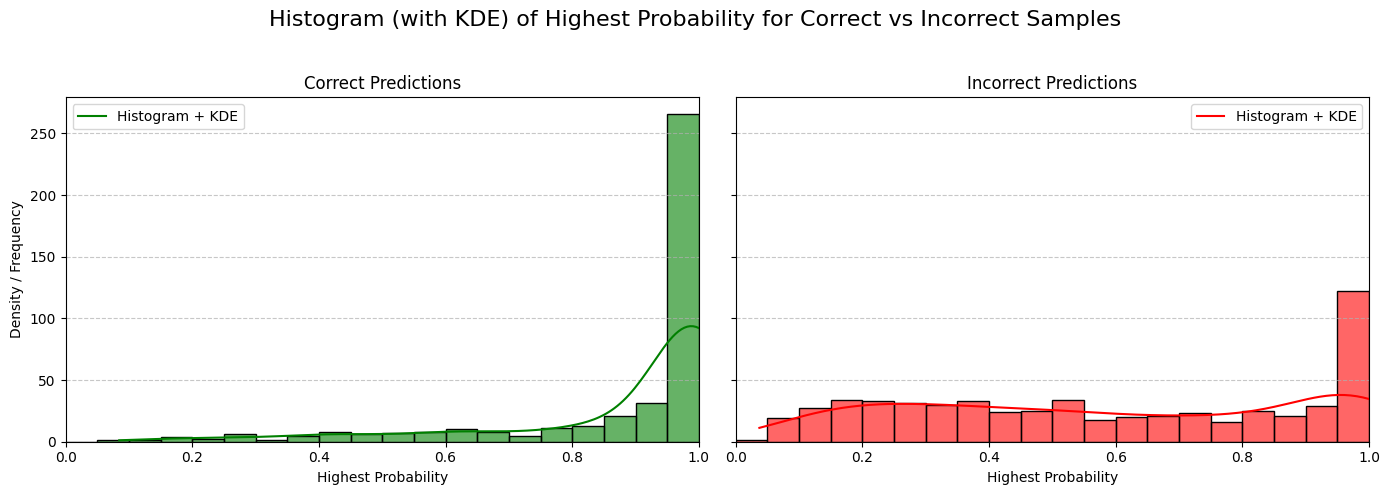

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

correct_highest_probs = [sample[0][1] for sample in correct_relevant_embeddings_with_probs]
incorrect_highest_probs = [sample[0][1] for sample in incorrect_relevant_embeddings_with_probs]

distributions = [
    (correct_highest_probs, "Correct Predictions", "green"),
    (incorrect_highest_probs, "Incorrect Predictions", "red"),
]

bin_edges = np.linspace(0, 1, 21)

for ax, (values, title, color) in zip(axes, distributions):
    values = np.array(values)
    if len(np.unique(values)) > 1:
        sns.histplot(values, bins=bin_edges, kde=True, color=color, edgecolor='black', alpha=0.6, ax=ax)
    else:
        sns.histplot(values, bins=bin_edges, kde=False, color=color, edgecolor='black', alpha=0.6, ax=ax)
    ax.set_xlabel("Highest Probability")
    ax.set_xlim(0, 1)
    ax.set_title(title)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    if ax == axes[0]:
        ax.set_ylabel("Density / Frequency")
    ax.legend(["Histogram + KDE" if len(np.unique(values)) > 1 else "Histogram"])

plt.suptitle("Histogram (with KDE) of Highest Probability for Correct vs Incorrect Samples", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

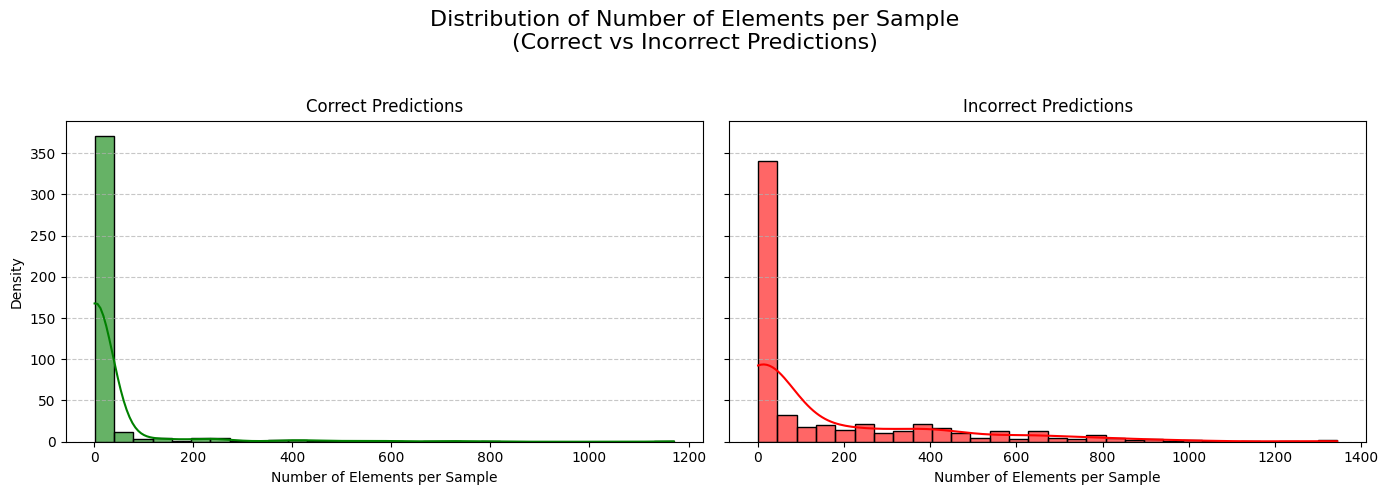

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
num_elements_correct = [len(sample) for sample in correct_relevant_embeddings_with_probs]
num_elements_incorrect = [len(sample) for sample in incorrect_relevant_embeddings_with_probs]

# Correct samples
sns.histplot(num_elements_correct, bins=30, color='green', kde=True, alpha=0.6, ax=axes[0])
axes[0].set_title("Correct Predictions")
axes[0].set_xlabel("Number of Elements per Sample")
axes[0].set_ylabel("Density")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Incorrect samples
sns.histplot(num_elements_incorrect, bins=30, color='red', kde=True, alpha=0.6, ax=axes[1])
axes[1].set_title("Incorrect Predictions")
axes[1].set_xlabel("Number of Elements per Sample")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle("Distribution of Number of Elements per Sample\n(Correct vs Incorrect Predictions)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

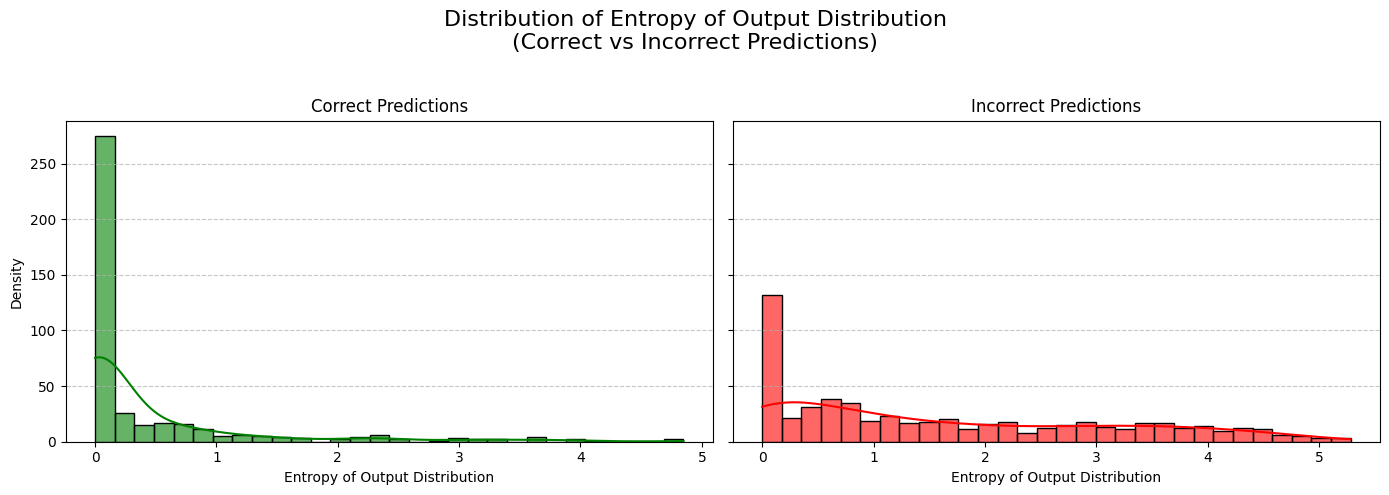

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def compute_entropy(probs):
    """Compute entropy for a probability distribution (expects 1D array)."""
    probs = np.array(probs)
    # Avoid log(0) by adding a small epsilon
    probs = probs[probs > 0]
    return -np.sum(probs * np.log(probs))

# Compute entropy for each sample in correct and incorrect predictions
correct_entropies = [compute_entropy([prob for _, prob in sample]) for sample in correct_relevant_embeddings_with_probs]
incorrect_entropies = [compute_entropy([prob for _, prob in sample]) for sample in incorrect_relevant_embeddings_with_probs]

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Correct samples
sns.histplot(correct_entropies, bins=30, color='green', kde=True, alpha=0.6, ax=axes[0])
axes[0].set_title("Correct Predictions")
axes[0].set_xlabel("Entropy of Output Distribution")
axes[0].set_ylabel("Density")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Incorrect samples
sns.histplot(incorrect_entropies, bins=30, color='red', kde=True, alpha=0.6, ax=axes[1])
axes[1].set_title("Incorrect Predictions")
axes[1].set_xlabel("Entropy of Output Distribution")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle("Distribution of Entropy of Output Distribution\n(Correct vs Incorrect Predictions)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Plotting the embeddings using T-SNE 

In order to choose the projection's hyper-parameters, the following blog was reviewedL "http://distill.pub/2016/misread-tsne/"

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


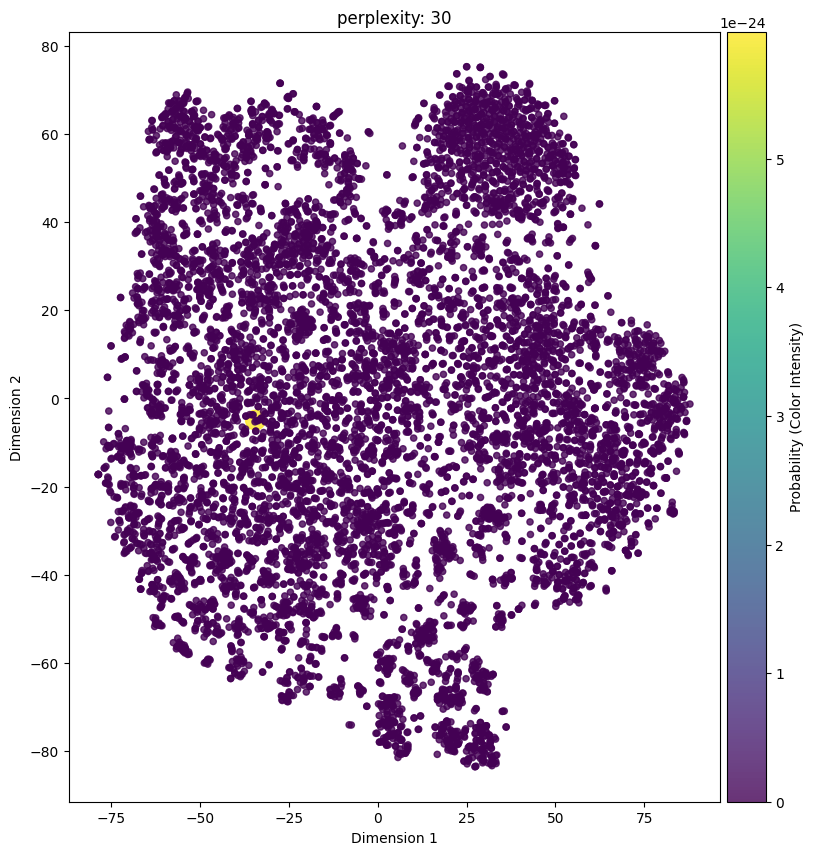

In [23]:
def visualize_embeddings_with_probabilities(embeddings_with_probs, ax=None, perplexity=None):
    """
    Visualizes the distribution of embeddings projected using t-SNE, 
    with point sizes and colors proportional to their probabilities.

    Args:
        embeddings_with_probs (list of tuples): A list of (embedding, probability) pairs.
        ax (matplotlib.axes.Axes, optional): Axes to plot on. If None, creates a new figure.

    Returns:
        None: Displays the plot or draws on the provided axes.
    """
    embeddings = np.array([embed for embed, prob in embeddings_with_probs])
    probabilities = np.array([prob for embed, prob in embeddings_with_probs])

    n_samples = len(embeddings)
    if perplexity is None:
        perplexity = min(30, max(5, n_samples - 1))
    else:
        perplexity = min(perplexity, n_samples - 1)
        # print("chosen perplexity:", perplexity)

    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    embedding_2d = tsne.fit_transform(embeddings)

    embedding_df = pd.DataFrame(embedding_2d, columns=["Dimension 1", "Dimension 2"])
    embedding_df["Probability"] = probabilities

    if ax is None:
        plt.figure(figsize=(10, 10))
        ax = plt.gca()

    # Use a perceptually uniform colormap and set vmin/vmax for sensitivity
    norm = plt.Normalize(probabilities.min(), probabilities.max())
    scatter = ax.scatter(
        embedding_df["Dimension 1"], 
        embedding_df["Dimension 2"], 
        s=20 + 180 * (embedding_df["Probability"] - probabilities.min()) / (probabilities.max() - probabilities.min()),
        c=embedding_df["Probability"], 
        cmap="viridis", 
        norm=norm,
        alpha=0.8
    )
    ax.set_title("perplexity: " + str(perplexity))
    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")
    cbar = plt.colorbar(scatter, ax=ax, pad=0.01)
    cbar.set_label("Probability (Color Intensity)")

    if ax is None:
        plt.show()

# Example usage:
visualize_embeddings_with_probabilities(incorrect_relevant_embeddings_with_probs[0])


In [ ]:
fig, axes = plt.subplots(10, 5, figsize=(25, 50), sharey=True)
perplexities = [2, 5, 10, 20, 50]

# Select 5 incorrect samples
incorrect_selected_indices = []
while len(incorrect_selected_indices) < 5:
    idx = np.random.choice(len(incorrect_relevant_embeddings_with_probs))
    if len(incorrect_relevant_embeddings_with_probs[idx]) > 10 and idx not in incorrect_selected_indices:
        incorrect_selected_indices.append(idx)

# Select 5 correct samples
correct_selected_indices = []
while len(correct_selected_indices) < 5:
    idx = np.random.choice(len(correct_relevant_embeddings_with_probs))
    if len(correct_relevant_embeddings_with_probs[idx]) > 10 and idx not in correct_selected_indices:
        correct_selected_indices.append(idx)

# Plot incorrect predictions (first 5 rows)
for i, idx in enumerate(incorrect_selected_indices):
    for j, perplexity in enumerate(perplexities):
        visualize_embeddings_with_probabilities(incorrect_relevant_embeddings_with_probs[idx], 
                                             ax=axes[i, j], 
                                             perplexity=perplexity)
        # if i == 0:
        #     axes[i, j].set_title(f"Perplexity={perplexity}")
        # else:
        #     axes[i, j].set_title(f"Incorrect Sample {idx}, Perplexity={perplexity}")

# Plot correct predictions (last 5 rows)
for i, idx in enumerate(correct_selected_indices):
    for j, perplexity in enumerate(perplexities):
        visualize_embeddings_with_probabilities(correct_relevant_embeddings_with_probs[idx], 
                                             ax=axes[i+5, j], 
                                             perplexity=perplexity)
        # axes[i+5, j].set_title(f"Correct Sample {idx}, Perplexity={perplexity}")

plt.tight_layout()
plt.show()

#### Plotting the embeddings using UMAP

In order to choose the projection's hyper-parameters, the following blog was reviewedL "https://pair-code.github.io/understanding-umap/"

In [31]:
import umap

def visualize_embeddings_with_probabilities_umap(embeddings_with_probs, ax=None, n_neighbors=15, min_dist=0.01):
    """
    Visualizes the distribution of embeddings projected using UMAP, 
    with point sizes and colors proportional to their probabilities.

    Args:
        embeddings_with_probs (list of tuples): A list of (embedding, probability) pairs.
        ax (matplotlib.axes.Axes, optional): Axes to plot on. If None, creates a new figure.
        n_neighbors (int): UMAP n_neighbors parameter.
        min_dist (float): UMAP min_dist parameter.

    Returns:
        None: Displays the plot or draws on the provided axes.
    """
    embeddings = np.array([embed for embed, prob in embeddings_with_probs])
    probabilities = np.array([prob for embed, prob in embeddings_with_probs])
    print(f"embedding length: {len(embeddings)}, probabilities length: {len(probabilities)}")

    reducer = umap.UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
    embedding_2d = reducer.fit_transform(embeddings)

    embedding_df = pd.DataFrame(embedding_2d, columns=["Dimension 1", "Dimension 2"])
    embedding_df["Probability"] = probabilities

    if ax is None:
        plt.figure(figsize=(10, 10))
        ax = plt.gca()

    # Use a perceptually uniform colormap and set vmin/vmax for sensitivity
    norm = plt.Normalize(probabilities.min(), probabilities.max())
    scatter = ax.scatter(
        embedding_df["Dimension 1"], 
        embedding_df["Dimension 2"], 
        s=20 + 180 * (embedding_df["Probability"] - probabilities.min()) / (probabilities.max() - probabilities.min() + 1e-8),
        c=embedding_df["Probability"], 
        cmap="viridis", 
        norm=norm,
        alpha=0.8
    )
    ax.set_title(f"UMAP: n_neighbors={n_neighbors}, min_dist={min_dist}")
    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")
    cbar = plt.colorbar(scatter, ax=ax, pad=0.01)
    cbar.set_label("Probability (Color Intensity)")

    if ax is None:
        plt.show()


embedding length: 149, probabilities length: 149


/home/eliasshaheen/miniconda3/envs/re-gen-ir-venv/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


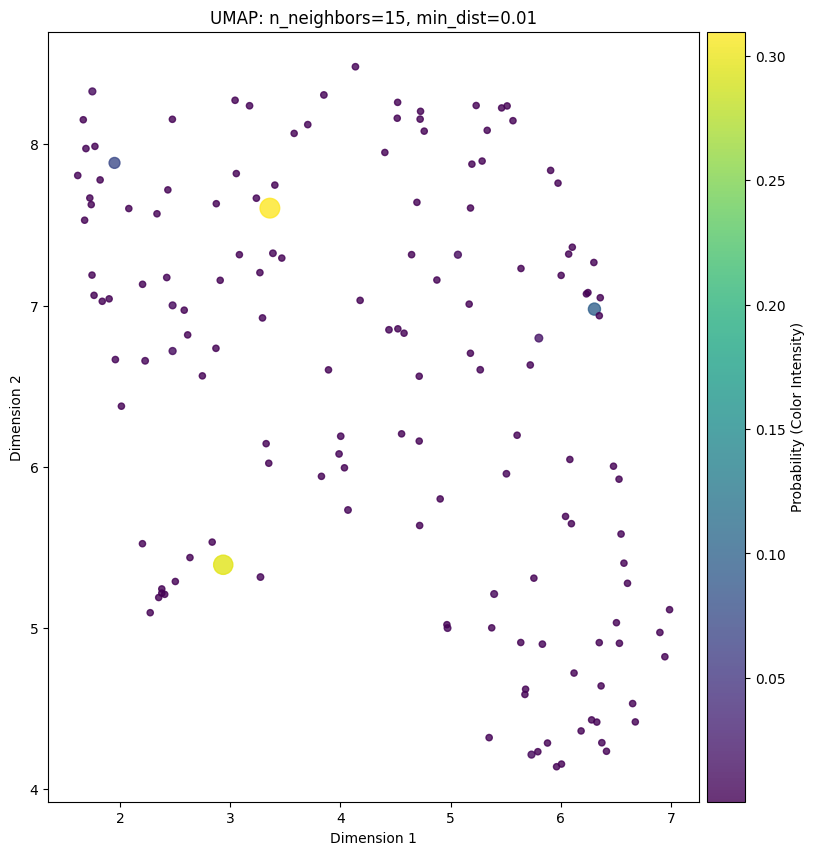

In [32]:
# Example usage:
visualize_embeddings_with_probabilities_umap(incorrect_relevant_embeddings_with_probs[0])

In [ ]:
# Comprehensive UMAP visualization testing and experimentation scheme

import umap

# Define a range of n_neighbors and min_dist values to experiment with
n_neighbors_list = [1, 2, 3, 4, 5]
min_dist_list = [0.0, 0.1, 0.5, 0.9]

# Select a few correct and incorrect samples with enough elements
def select_samples(embeddings_with_probs_list, num_samples=3, min_elements=10):
    selected_indices = []
    while len(selected_indices) < num_samples:
        idx = np.random.choice(len(embeddings_with_probs_list))
        if len(embeddings_with_probs_list[idx]) > min_elements and idx not in selected_indices:
            selected_indices.append(idx)
    return selected_indices

incorrect_selected_indices = select_samples(incorrect_relevant_embeddings_with_probs, num_samples=3)
correct_selected_indices = select_samples(correct_relevant_embeddings_with_probs, num_samples=3)

# Plot grid: rows = samples, columns = n_neighbors * min_dist combinations
num_rows = 6  # 3 incorrect + 3 correct
num_cols = len(n_neighbors_list) * len(min_dist_list)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(4*num_cols, 4*num_rows), sharex=True, sharey=True)

for row, idx in enumerate(incorrect_selected_indices + correct_selected_indices):
    embeddings_with_probs = (incorrect_relevant_embeddings_with_probs if row < 3 else correct_relevant_embeddings_with_probs)[idx]
    for col, (n_neighbors, min_dist) in enumerate([(n, m) for n in n_neighbors_list for m in min_dist_list]):
        ax = axes[row, col] if num_rows > 1 else axes[col]
        try:
            visualize_embeddings_with_probabilities_umap(
                embeddings_with_probs,
                ax=ax,
                n_neighbors=n_neighbors,
                min_dist=min_dist
            )
        except Exception as e:
            ax.set_title(f"Error: {e}")
            ax.axis('off')
        if row == 0:
            ax.set_title(f"n_neighbors={n_neighbors}\nmin_dist={min_dist}", fontsize=10)
        if col == 0:
            ax.set_ylabel("Incorrect" if row < 3 else "Correct", fontsize=12)

plt.suptitle("UMAP Projections: Various n_neighbors and min_dist Values\nRows: Samples (Top=Incorrect, Bottom=Correct)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

#### Another try to visualize embeddings

In [72]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap

# 3-liner to load all embeddings
embeddings_path = "document_embeddings_multi-qa-mpnet-base-dot-v1.npy"
if os.path.exists(embeddings_path):
    document_embeddings = np.load(embeddings_path)
else:
    raise FileNotFoundError(f"{embeddings_path} not found")

def layout_embeddings_with_probabilities_umap(
    embeddings_with_probs,
    all_embeddings=None,
    ax=None,
    n_neighbors=15,
    min_dist=0.01,
    title=None
):
    """
    Visualizes all document embeddings with UMAP in light grey,
    and overlays a subset of embeddings (with probabilities) colored
    and sized by their probability.

    Args:
        embeddings_with_probs (list of (embedding, prob) tuples):
            The subset you care about.
        all_embeddings (np.ndarray, optional):
            Full set of embeddings to give context. If None, uses
            the global `document_embeddings`.
        ax (matplotlib.axes.Axes, optional):
            Axes to plot on. If None, creates a new figure.
        n_neighbors (int): UMAP n_neighbors parameter.
        min_dist (float): UMAP min_dist parameter.
    """
    # 1) decide which full-embedding array to use
    if all_embeddings is None:
        try:
            all_embeddings = document_embeddings
        except NameError:
            raise ValueError("Please pass in `all_embeddings` or load it as `document_embeddings`.")

    # 2) split out your input subset
    subset_embeds = np.array([e for e, p in embeddings_with_probs])
    subset_probs  = np.array([p for e, p in embeddings_with_probs])

    # 3) fit UMAP on ALL embeddings, then transform subset
    reducer = umap.UMAP(
        n_components=2,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        random_state=42
    )
    all_2d    = reducer.fit_transform(all_embeddings)
    subset_2d = reducer.transform(subset_embeds)

    # 4) prepare plotting area
    if ax is None:
        plt.figure(figsize=(10, 10))
        ax = plt.gca()

    # 5) plot all docs in lighter grey with reduced alpha
    ax.scatter(
        all_2d[:, 0], all_2d[:, 1],
        s=8,  # smaller size for background
        c="lightgrey",
        alpha=0.2,  # more transparent
        label="All documents",
        zorder=1  # ensure background stays behind
    )

    # 6) Enhanced plotting for subset - ensure high-prob points dominate visually
    norm = plt.Normalize(subset_probs.min(), subset_probs.max())
    
    # More dramatic size scaling (min 40 → max 400)
    subset_sizes = 40 + 360 * (subset_probs - subset_probs.min()) / (
        subset_probs.max() - subset_probs.min() + 1e-8
    )
    
    # Border scaling - thicker for high probability
    edge_widths = 0.5 + 2.0 * (subset_probs - subset_probs.min()) / (
        subset_probs.max() - subset_probs.min() + 1e-8
    )
    
    # Use high-contrast colormap
    scatter = ax.scatter(
        subset_2d[:, 0],
        subset_2d[:, 1],
        s=subset_sizes,
        c=subset_probs,
        cmap="inferno",  # High contrast: dark to bright yellow
        norm=norm,
        alpha=0.95,  # Nearly opaque for high-prob points
        edgecolors='black',
        linewidths=edge_widths,
        zorder=3,  # Render above everything else
        label="Input documents"
    )

    # 7) Add semi-transparent halo around high-prob points
    high_prob_mask = subset_probs > np.percentile(subset_probs, 75)
    if np.any(high_prob_mask):
        ax.scatter(
            subset_2d[high_prob_mask, 0],
            subset_2d[high_prob_mask, 1],
            s=subset_sizes[high_prob_mask] * 1.8,  # Larger halo
            facecolor='none',
            edgecolor='yellow',
            linewidth=0.7,
            alpha=0.3,
            zorder=2  # Between background and main points
        )

    # # 5) plot all docs in light grey
    # ax.scatter(
    #     all_2d[:, 0], all_2d[:, 1],
    #     s=10, c="lightgrey", alpha=0.5,
    #     label="All documents"
    # )

    # # 6) plot your subset, sizing & coloring by prob
    # norm = plt.Normalize(subset_probs.min(), subset_probs.max())
    # subset_sizes = 20 + 180 * (subset_probs - subset_probs.min()) / (
    #     subset_probs.max() - subset_probs.min() + 1e-8
    # )

    # scatter = ax.scatter(
    #     subset_2d[:, 0],
    #     subset_2d[:, 1],
    #     s=subset_sizes,
    #     c=subset_probs,
    #     cmap="viridis",
    #     norm=norm,
    #     alpha=0.8,
    #     label="Input documents"
    # )

    # 7) finish off
    if title is None:
        ax.set_title(f"UMAP (n_neighbors={n_neighbors}, min_dist={min_dist})")
    else:
        ax.set_title(title)
    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")
    ax.legend(loc="best")

    cbar = plt.colorbar(scatter, ax=ax, pad=0.01)
    cbar.set_label("Probability")

    if ax is None:
        plt.show()


/home/eliasshaheen/miniconda3/envs/re-gen-ir-venv/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


/home/eliasshaheen/miniconda3/envs/re-gen-ir-venv/lib/python3.8/site-packages/matplotlib/collections.py:409: UserWarning: Warning: converting a masked element to nan.
  renderer.draw_path_collection(


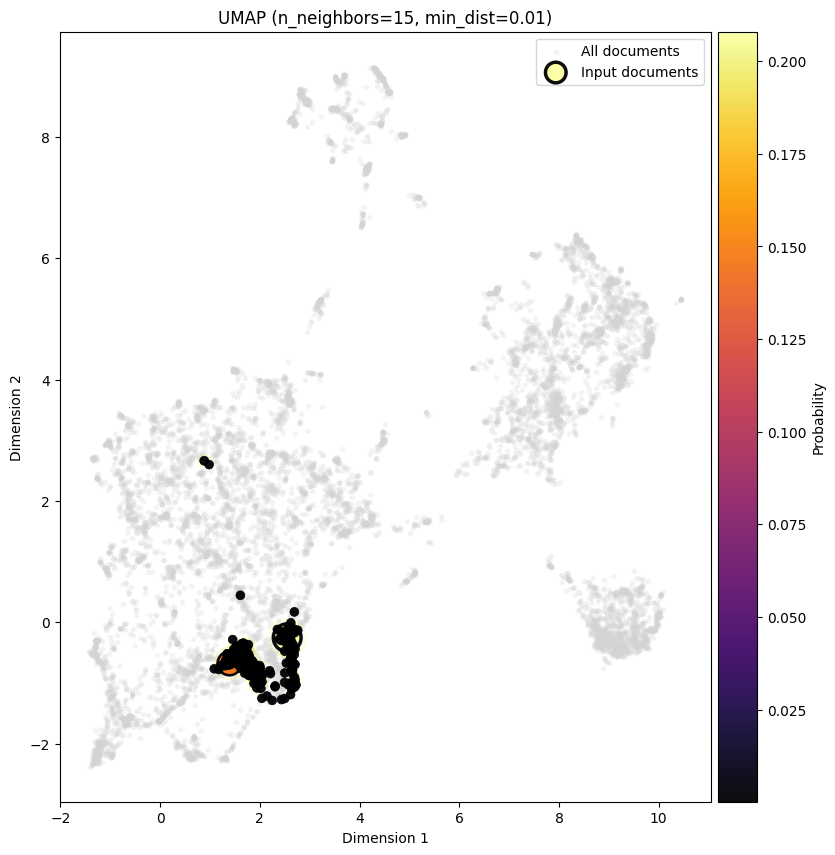

In [49]:
layout_embeddings_with_probabilities_umap(incorrect_relevant_embeddings_with_probs[55], document_embeddings)

/home/eliasshaheen/miniconda3/envs/re-gen-ir-venv/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/eliasshaheen/miniconda3/envs/re-gen-ir-venv/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/eliasshaheen/miniconda3/envs/re-gen-ir-venv/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/eliasshaheen/miniconda3/envs/re-gen-ir-venv/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/eliasshaheen/miniconda3/envs/re-gen-ir-venv/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for p

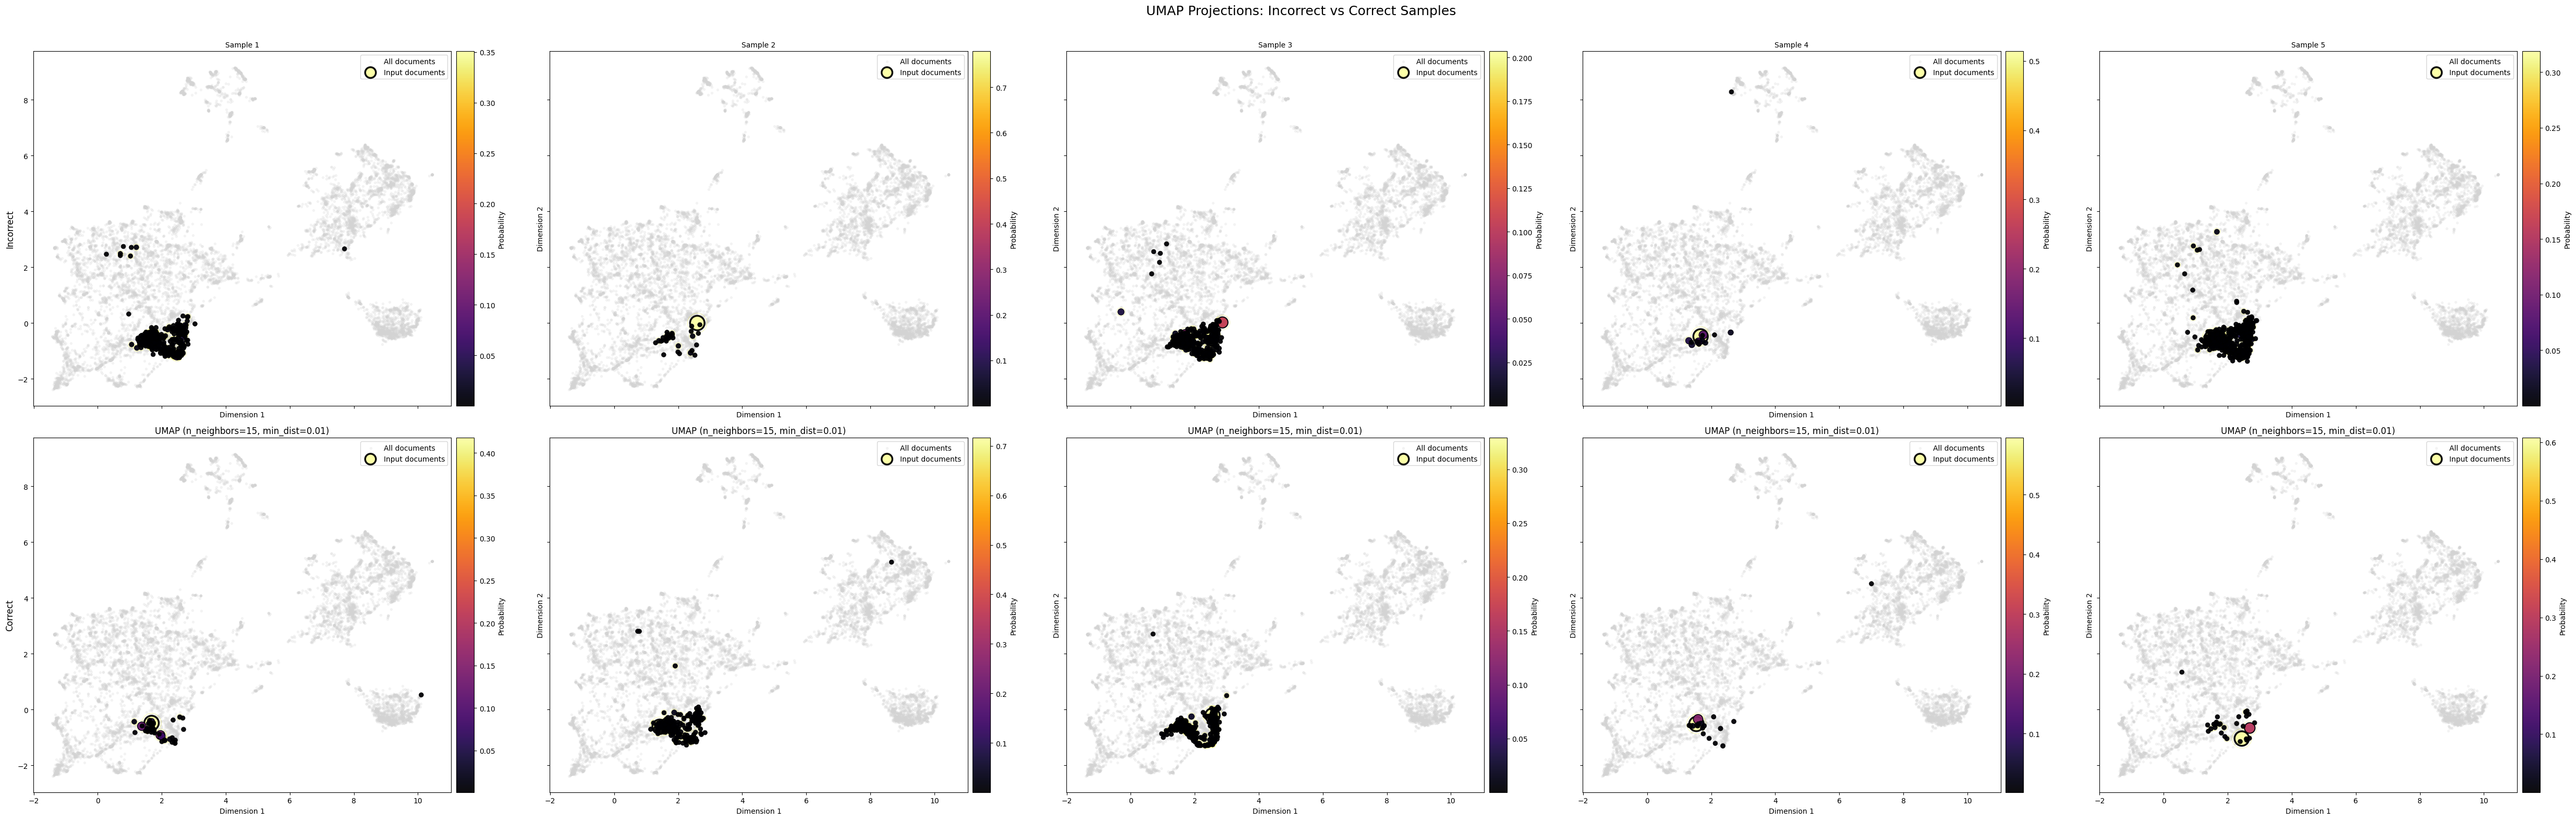

In [ ]:
# Select a few correct and incorrect samples with enough elements
def select_samples(embeddings_with_probs_list, num_samples=3, min_elements=10):
    selected_indices = []
    while len(selected_indices) < num_samples:
        idx = np.random.choice(len(embeddings_with_probs_list))
        if len(embeddings_with_probs_list[idx]) > min_elements and idx not in selected_indices:
            selected_indices.append(idx)
    return selected_indices

incorrect_selected_indices = select_samples(incorrect_relevant_embeddings_with_probs, num_samples=5)
correct_selected_indices = select_samples(correct_relevant_embeddings_with_probs, num_samples=5)

n_rows = 2
n_cols = len(correct_selected_indices)

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(10 * n_cols, 8 * n_rows),
    sharex=True, sharey=True
)

# ============ ADJUSTED BELOW ==================

# ensure `axes` is always a 2D array of shape (2, n_cols)
axes = np.atleast_2d(axes)

# loop over the two rows: 0→incorrect, 1→correct
for row, (selected_indices, label) in enumerate([
    (incorrect_selected_indices, "Incorrect"),
    (correct_selected_indices,   "Correct")
]):
    for col, idx in enumerate(selected_indices):
        ax = axes[row, col]
        # pick the right list (incorrect vs correct) and grab that sample
        embeddings_with_probs = (
            incorrect_relevant_embeddings_with_probs[idx]
            if row == 0
            else
            correct_relevant_embeddings_with_probs[idx]
        )
        try:
            layout_embeddings_with_probabilities_umap(
                embeddings_with_probs,
                all_embeddings=document_embeddings,
                ax=ax
            )
        except Exception as e:
            ax.set_title(f"Error: {e}")
            ax.axis("off")

        # only the top row shows column titles (Sample 1…5)
        if row == 0:
            ax.set_title(f"Sample {col+1}", fontsize=10)

        # only the first column shows the row label
        if col == 0:
            ax.set_ylabel(label, fontsize=12)

# global title and layout
plt.suptitle(
    "UMAP Projections: Incorrect vs Correct Samples",
    fontsize=18
)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

/home/eliasshaheen/miniconda3/envs/re-gen-ir-venv/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/eliasshaheen/miniconda3/envs/re-gen-ir-venv/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/eliasshaheen/miniconda3/envs/re-gen-ir-venv/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/eliasshaheen/miniconda3/envs/re-gen-ir-venv/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/eliasshaheen/miniconda3/envs/re-gen-ir-venv/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for p

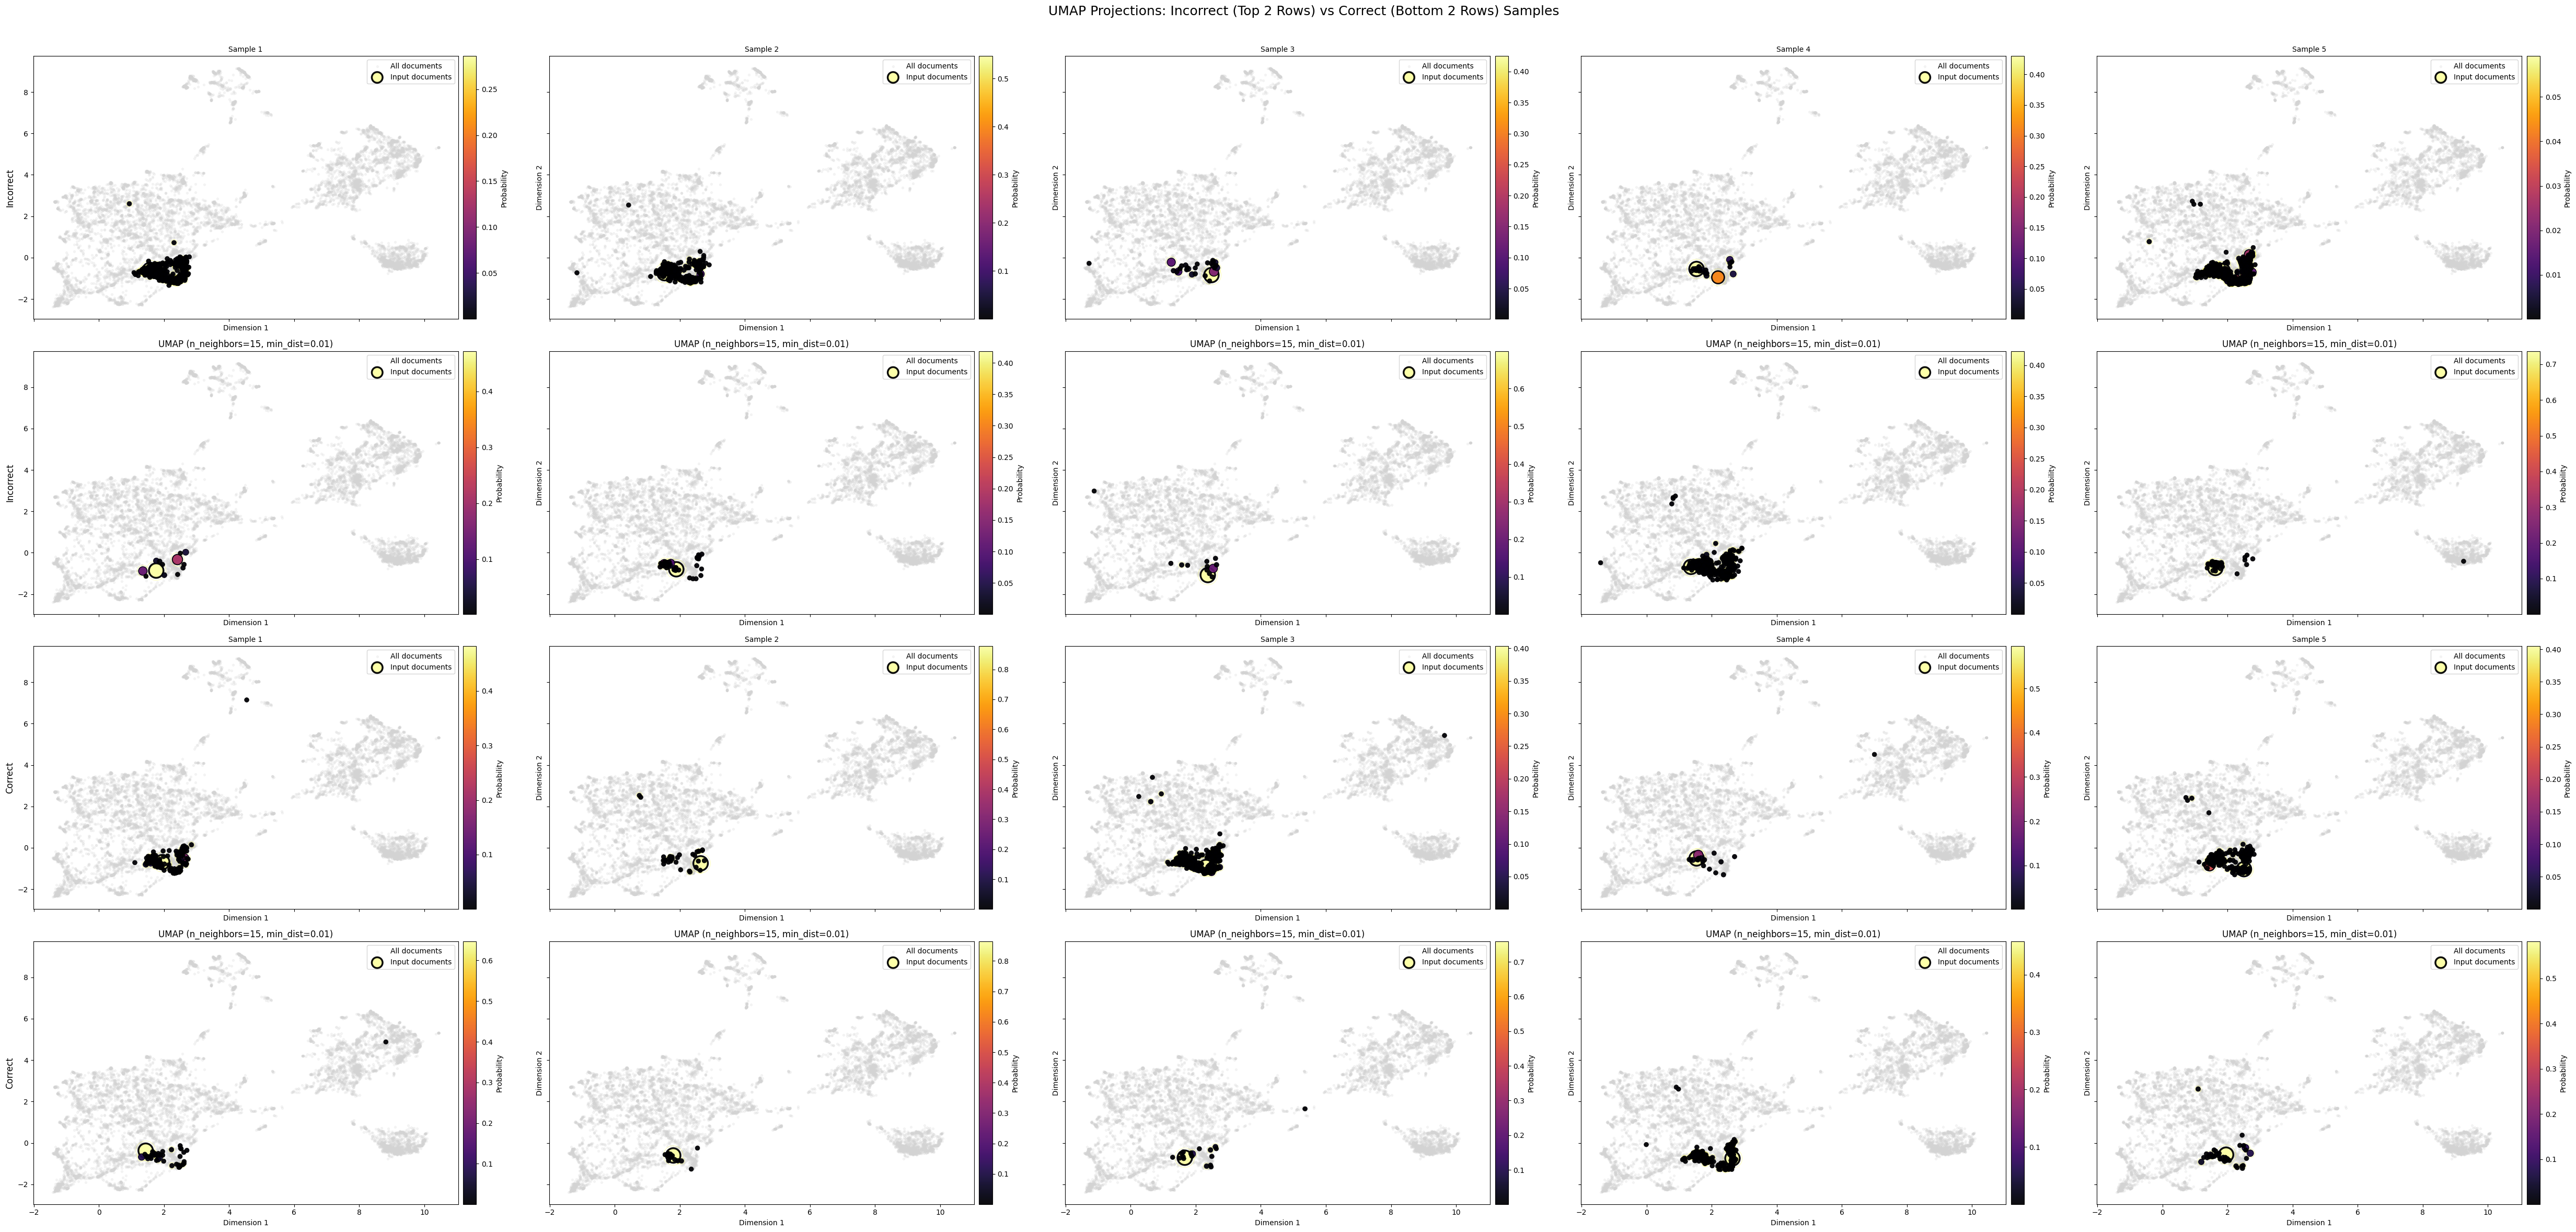

In [75]:
# Select 10 incorrect and 10 correct samples with enough elements
def select_samples(embeddings_with_probs_list, num_samples=10, min_elements=10):
    selected_indices = []
    while len(selected_indices) < num_samples:
        idx = np.random.choice(len(embeddings_with_probs_list))
        if len(embeddings_with_probs_list[idx]) > min_elements and idx not in selected_indices:
            selected_indices.append(idx)
    return selected_indices

incorrect_selected_indices = select_samples(incorrect_relevant_embeddings_with_probs, num_samples=10)
correct_selected_indices = select_samples(correct_relevant_embeddings_with_probs, num_samples=10)

n_rows = 4
n_cols = 5

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(10 * n_cols, 6 * n_rows),
    sharex=True, sharey=True
)

axes = np.atleast_2d(axes)

# First two rows: incorrect samples
for row in range(2):
    for col in range(n_cols):
        idx = incorrect_selected_indices[row * n_cols + col]
        ax = axes[row, col]
        embeddings_with_probs = incorrect_relevant_embeddings_with_probs[idx]
        try:
            layout_embeddings_with_probabilities_umap(
                embeddings_with_probs,
                all_embeddings=document_embeddings,
                ax=ax
            )
        except Exception as e:
            ax.set_title(f"Error: {e}")
            ax.axis("off")
        if row == 0:
            ax.set_title(f"Sample {col+1}", fontsize=10)
        if col == 0:
            ax.set_ylabel("Incorrect", fontsize=12)

# Last two rows: correct samples
for row in range(2, 4):
    for col in range(n_cols):
        idx = correct_selected_indices[(row - 2) * n_cols + col]
        ax = axes[row, col]
        embeddings_with_probs = correct_relevant_embeddings_with_probs[idx]
        try:
            layout_embeddings_with_probabilities_umap(
                embeddings_with_probs,
                all_embeddings=document_embeddings,
                ax=ax
            )
        except Exception as e:
            ax.set_title(f"Error: {e}")
            ax.axis("off")
        if row == 2:
            ax.set_title(f"Sample {col+1}", fontsize=10)
        if col == 0:
            ax.set_ylabel("Correct", fontsize=12)

plt.suptitle(
    "UMAP Projections: Incorrect (Top 2 Rows) vs Correct (Bottom 2 Rows) Samples",
    fontsize=18
)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

#### Similar Probabilities to Similar Semantic Documents

In [12]:
import os
import torch
import numpy as np
from scipy.stats import spearmanr
from sklearn.metrics.pairwise import cosine_similarity
from tqdm.auto import tqdm

# 1) Load or compute your document embeddings
embeddings_path = "document_embeddings_multi-qa-mpnet-base-dot-v1.npy"
if os.path.exists(embeddings_path):
    document_embeddings = np.load(embeddings_path)
else:
    raise FileNotFoundError(f"{embeddings_path} not found")

# 2) Build your ID list (must match the order of document_embeddings)
all_doc_ids = [doc["id"] for doc in documents]
num_docs    = len(all_doc_ids)

# 3) Register each doc as a single SPECIAL TOKEN in the tokenizer
doc_special_tokens = [f"<doc_{did}>" for did in all_doc_ids]
tokenizer.add_special_tokens({"additional_special_tokens": doc_special_tokens})
model.resize_token_embeddings(len(tokenizer))

# 4) Pre‐compute the token‐IDs for each special token
doc_token_ids = tokenizer.convert_tokens_to_ids(doc_special_tokens)
assert len(doc_token_ids) == num_docs, "Mismatch in doc_token_ids length"

def evaluate_semantic_probability_correlation(
    model, tokenizer, test_samples, doc_embeddings, all_doc_ids, doc_token_ids
):
    model.eval()
    device = next(model.parameters()).device

    all_correlations = []
    bucket_results  = {b: [] for b in [0.0, 0.3, 0.5, 0.7, 0.9]}
    nn_precisions   = []

    # 1) Spearman & bucket analysis
    for sample in tqdm(test_samples, desc="Corr & buckets", unit="sample"):
        query           = sample["query"]
        relevant_doc_id = sample["relevant_docs"][0]
        rel_idx         = all_doc_ids.index(relevant_doc_id)

        # 1a) Embedding-based similarities
        rel_emb   = doc_embeddings[rel_idx].reshape(1, -1)
        doc_sims  = cosine_similarity(doc_embeddings, rel_emb).flatten()

        # 1b) Model probabilities *over your special doc tokens*
        inputs           = tokenizer(query, return_tensors="pt").to(device)
        decoder_start    = torch.tensor([[model.config.decoder_start_token_id]]).to(device)
        with torch.no_grad():
            out = model(**inputs, decoder_input_ids=decoder_start)
        logits     = out.logits[0, -1].cpu()                       # (vocab_size,)
        doc_logits = logits[doc_token_ids]                         # (num_docs,)
        doc_probs  = torch.softmax(doc_logits, dim=0).numpy()      # (num_docs,)

        # 1c) Spearman (excluding the true doc)
        mask       = np.ones(num_docs, dtype=bool)
        mask[rel_idx] = False
        rho, _     = spearmanr(doc_sims[mask], doc_probs[mask])
        all_correlations.append(rho)

        # 1d) Bucketed means
        for b in bucket_results:
            bmask = (doc_sims >= b) & (doc_sims < b + 0.2) & mask
            if bmask.any():
                bucket_results[b].append(doc_probs[bmask].mean())

    # 2) Nearest-neighbor precision@10
    for sample in tqdm(test_samples, desc="NN precision", unit="sample"):
        query           = sample["query"]
        relevant_doc_id = sample.get("doc_id", sample["relevant_docs"][0])
        rel_idx         = all_doc_ids.index(relevant_doc_id)

        # 2a) Find the 10 nearest by embedding
        sims    = cosine_similarity(
            doc_embeddings, doc_embeddings[rel_idx].reshape(1, -1)
        ).flatten()
        nn_idxs = np.argsort(sims)[::-1][1:11]

        # 2b) Recompute doc_probs as above
        inputs           = tokenizer(query, return_tensors="pt").to(device)
        decoder_start    = torch.tensor([[model.config.decoder_start_token_id]]).to(device)
        with torch.no_grad():
            out = model(**inputs, decoder_input_ids=decoder_start)
        logits     = out.logits[0, -1].cpu()
        doc_logits = logits[doc_token_ids]
        doc_probs  = torch.softmax(doc_logits, dim=0).numpy()

        # 2c) Precision@10 (frac. of nearest whose prob > mean prob)
        mean_p    = doc_probs.mean()
        correct   = sum(1 for idx in nn_idxs if doc_probs[idx] > mean_p)
        nn_precisions.append(correct / len(nn_idxs))

    return {
        "spearman_mean":      np.nanmean(all_correlations),
        "spearman_std":       np.nanstd(all_correlations),
        "prob_by_similarity": {b: np.mean(v) for b, v in bucket_results.items() if v},
        "nn_precision":       np.mean(nn_precisions)
    }

# 5) Run it
results = evaluate_semantic_probability_correlation(
    model,
    tokenizer,
    test_samples,
    document_embeddings,
    all_doc_ids,
    doc_token_ids
)

print("\n===== Semantic Probability Correlation =====")
print(f"Spearman ρ: {results['spearman_mean']:.3f} ± {results['spearman_std']:.3f}")
print("Probability by similarity bucket:")
for sim, prob in sorted(results["prob_by_similarity"].items()):
    print(f"  sim ≥ {sim:.1f}: {prob:.5f}")
print(f"NN Precision@10: {results['nn_precision']:.3f}")


Corr & buckets:   0%|          | 0/1000 [00:00<?, ?sample/s]

NN precision:   0%|          | 0/1000 [00:00<?, ?sample/s]


===== Semantic Probability Correlation =====
Spearman ρ: 0.001 ± 0.011
Probability by similarity bucket:
  sim ≥ 0.0: 0.00010
  sim ≥ 0.3: 0.00010
  sim ≥ 0.5: 0.00015
  sim ≥ 0.7: 0.00006
  sim ≥ 0.9: 0.00022
NN Precision@10: 0.083
